# Feature Engineering - Gemstone Price Prediction

In [37]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class


# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
)

from feature_engine.creation import MathFeatures
from feature_engine.selection import DropCorrelatedFeatures

from feature_engine.transformation import (
    YeoJohnsonTransformer,
)

from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# os
import os
from os.path import join

In [2]:
os.getcwd() # current directory

'C:\\Users\\ivan_\\Desktop\\projects\\playground_series_gemstone_price_dataset\\notebooks'

## Setting paths

In [3]:
root_dir = r'C:\\Users\\ivan_\\Desktop\\projects\\playground_series_gemstone_price_dataset' # set rot dir to project dir
os.chdir(root_dir)
os.getcwd()

'C:\\Users\\ivan_\\Desktop\\projects\\playground_series_gemstone_price_dataset'

In [4]:
# Data paths
os.listdir(join(root_dir,"data"))

['.gitignore',
 'data_dictionary.xlsx',
 'sample_submission.csv',
 'submissions',
 'test.csv',
 'test.csv.dvc',
 'train.csv',
 'train.csv.dvc']

In [5]:
data_train_path = join(root_dir,"data","train.csv")
data_test_path = join(root_dir,"data","test.csv")
data_dict_path = join(root_dir,"data","data_dictionary.xlsx")

## Loading The Data

In [6]:
df_train = pd.read_csv(data_train_path)
df_test = pd.read_csv(data_test_path)
data_dict = pd.read_excel(data_dict_path)

In [7]:
df_train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [8]:
df_test.head()

id  carat        cut color clarity  depth  table     x     y     z
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24

In [9]:
data_dict

Variable Name  \
0         Carat   
1           Cut   
2        Color    
3       Clarity   
4         Depth   
5         Table   
6         Price   
7             X   
8             Y   
9             Z   

                                                                                                                                                                                              Description  
0                                                                                                                                                                     Carat weight of the cubic zirconia.  
1                                                                                      Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.  
2                                                                                                                                     Colour of the cubic zirconia.With D being the best and J the worst.  
3   cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  
4                                                                                           The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.  
5                                                                                                              The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.  
6                                                                                                                                                                        the Price of the cubic zirconia.  
7                                                                                                                                                                     Length of the cubic zirconia in mm.  
8                                                                                                                                                                      Width of the cubic zirconia in mm.  
9                                                                                                                                                                     Height of the cubic zirconia in mm.

## Setting The Seed

In [10]:
SEED = 8274
np.random.seed(SEED)

In [11]:
X, y = df_train.drop(columns = ["id","price"]).copy(), df_train["price"].copy()

## Feature Engineering

### Numerical Variable transformation

In [12]:
numeric_var_to_trans = ["carat"]

yeo_transformer = YeoJohnsonTransformer(
        variables = numeric_var_to_trans)

X = yeo_transformer.fit_transform(X)

### join rare label

In [13]:
X["clarity"].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [14]:
X = X.replace("I1","SI2").replace("SI2","SI2andI1")

### Categorical Variables

In [15]:
color_mappings = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}

X["color"] = X["color"].map(color_mappings)

In [16]:
cut_mappings = {"Fair":1, "Good":2, "Very Good":3, "Premium":5, "Ideal":6}

X["cut"] = X["cut"].map(cut_mappings)

In [17]:
clarity_mappings = {"IF":1, "VVS1":2, "VVS2":3, "VS1":4, "VS2":5,
                    "SI1":6, "SI2andI1":7}

X["clarity"] = X["clarity"].map(clarity_mappings)

In [18]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z
0  0.555290    5      3        5   62.2   58.0  7.27  7.33  4.55
1  0.609005    3      7        7   62.0   58.0  8.06  8.12  5.05
2  0.391096    6      4        4   61.2   57.0  5.69  5.73  3.50
3  0.235654    6      4        4   61.6   56.0  4.38  4.41  2.71
4  0.576819    5      4        5   62.6   59.0  7.65  7.61  4.77

### Agregate variables

In [19]:
AV = AutoViz_Class()

In [20]:
# quality measurement
quality_vars = ["cut","color","clarity"]

quality_transformer = MathFeatures(
        variables = quality_vars,
        func = ["sum","mean","prod"])

X = quality_transformer.fit_transform(X)

In [21]:
quality_transformer.get_feature_names_out()

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'sum_cut_color_clarity',
 'mean_cut_color_clarity',
 'prod_cut_color_clarity']

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    6 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


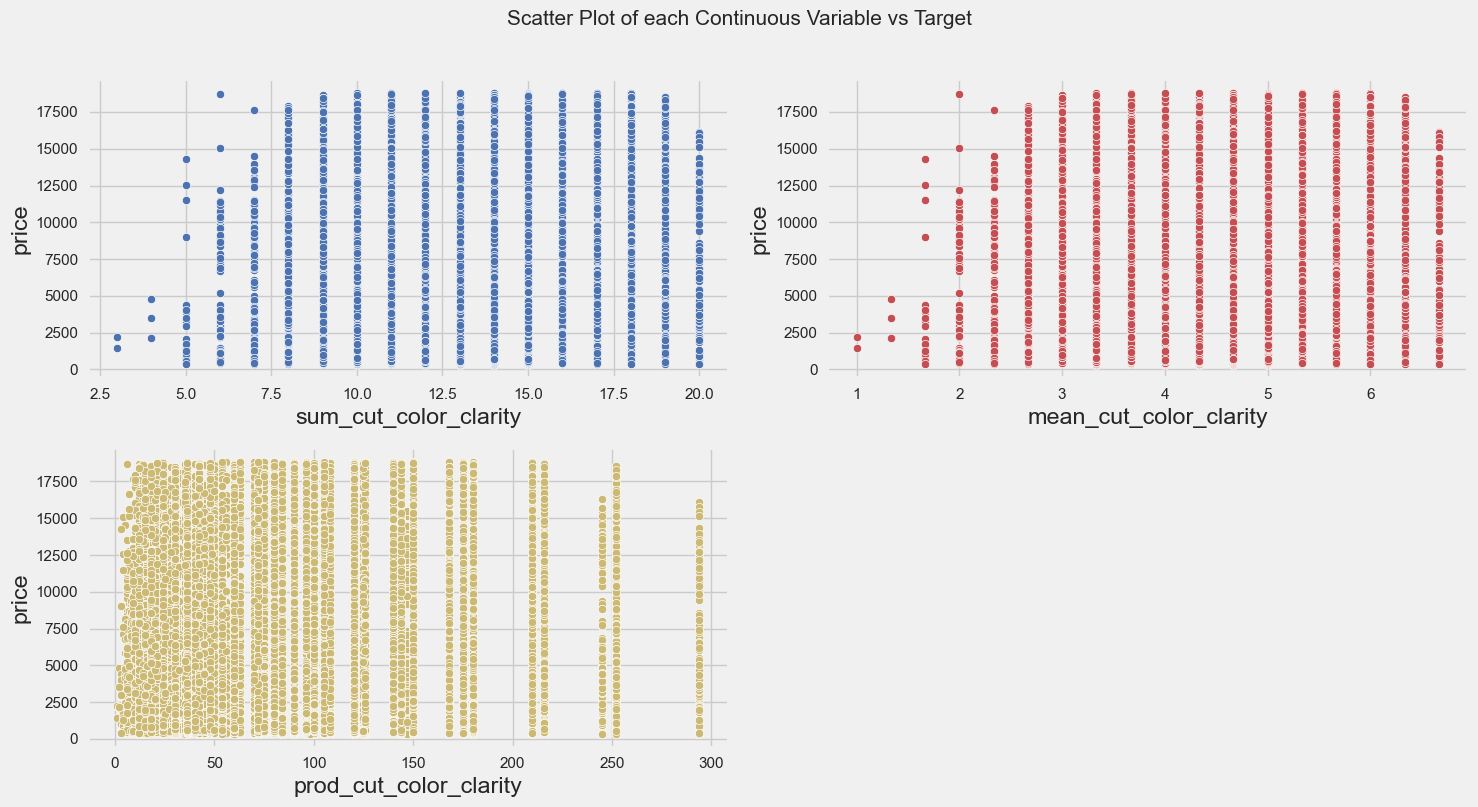

Number of All Scatter Plots = 6


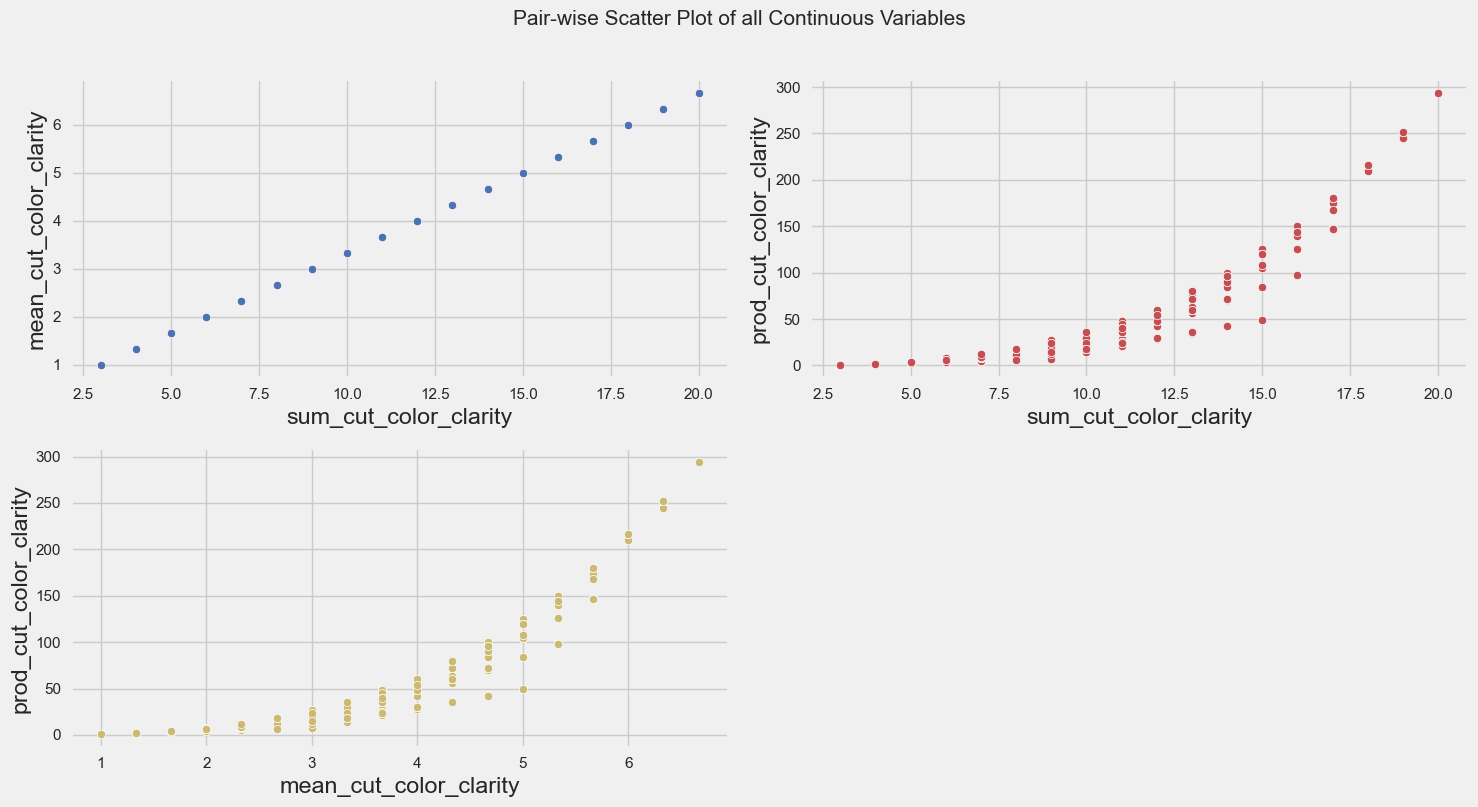

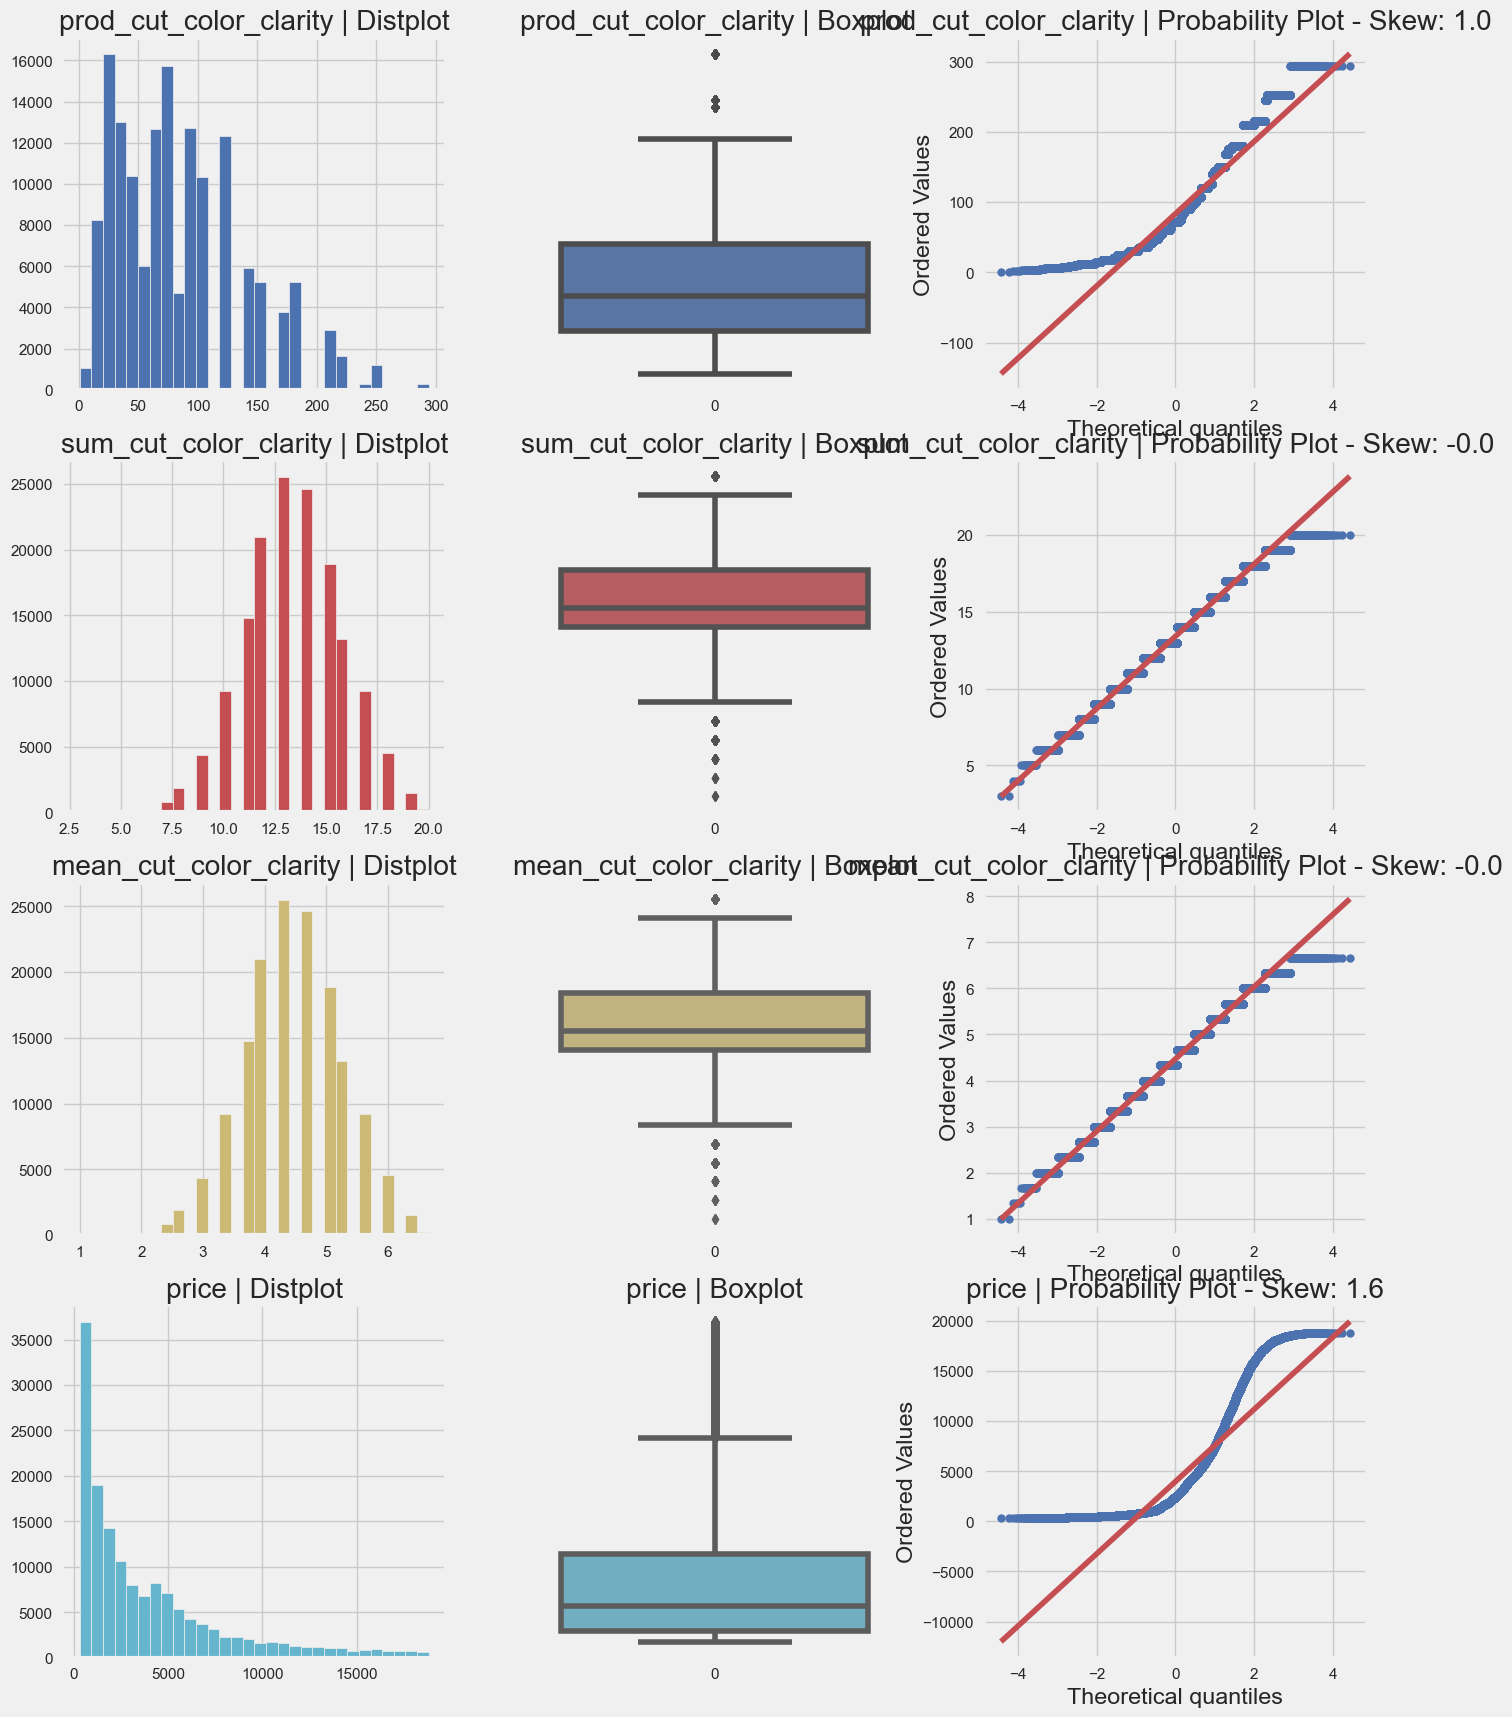

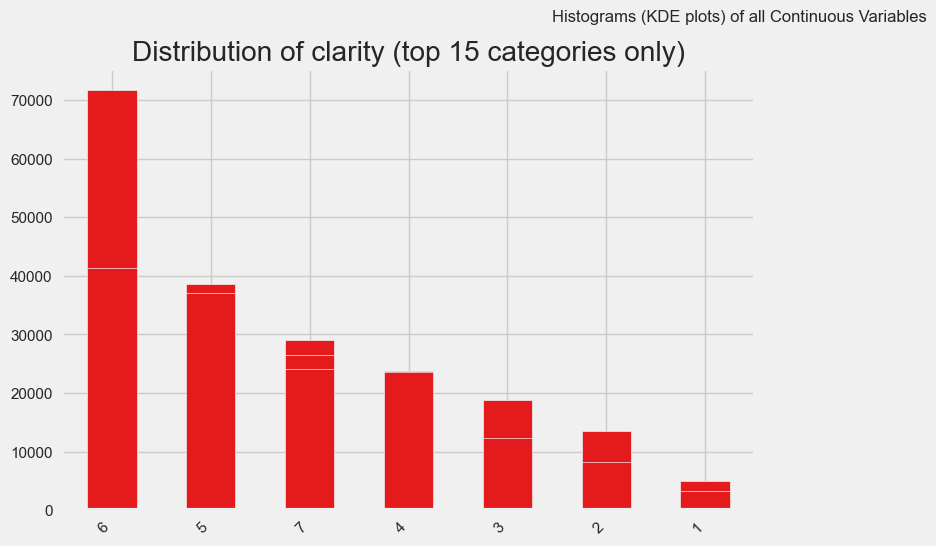

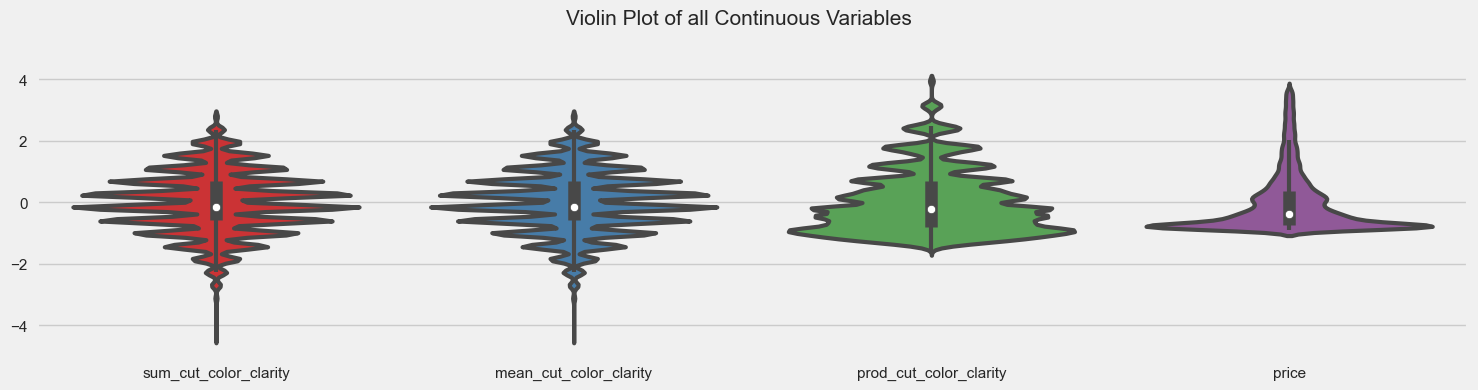

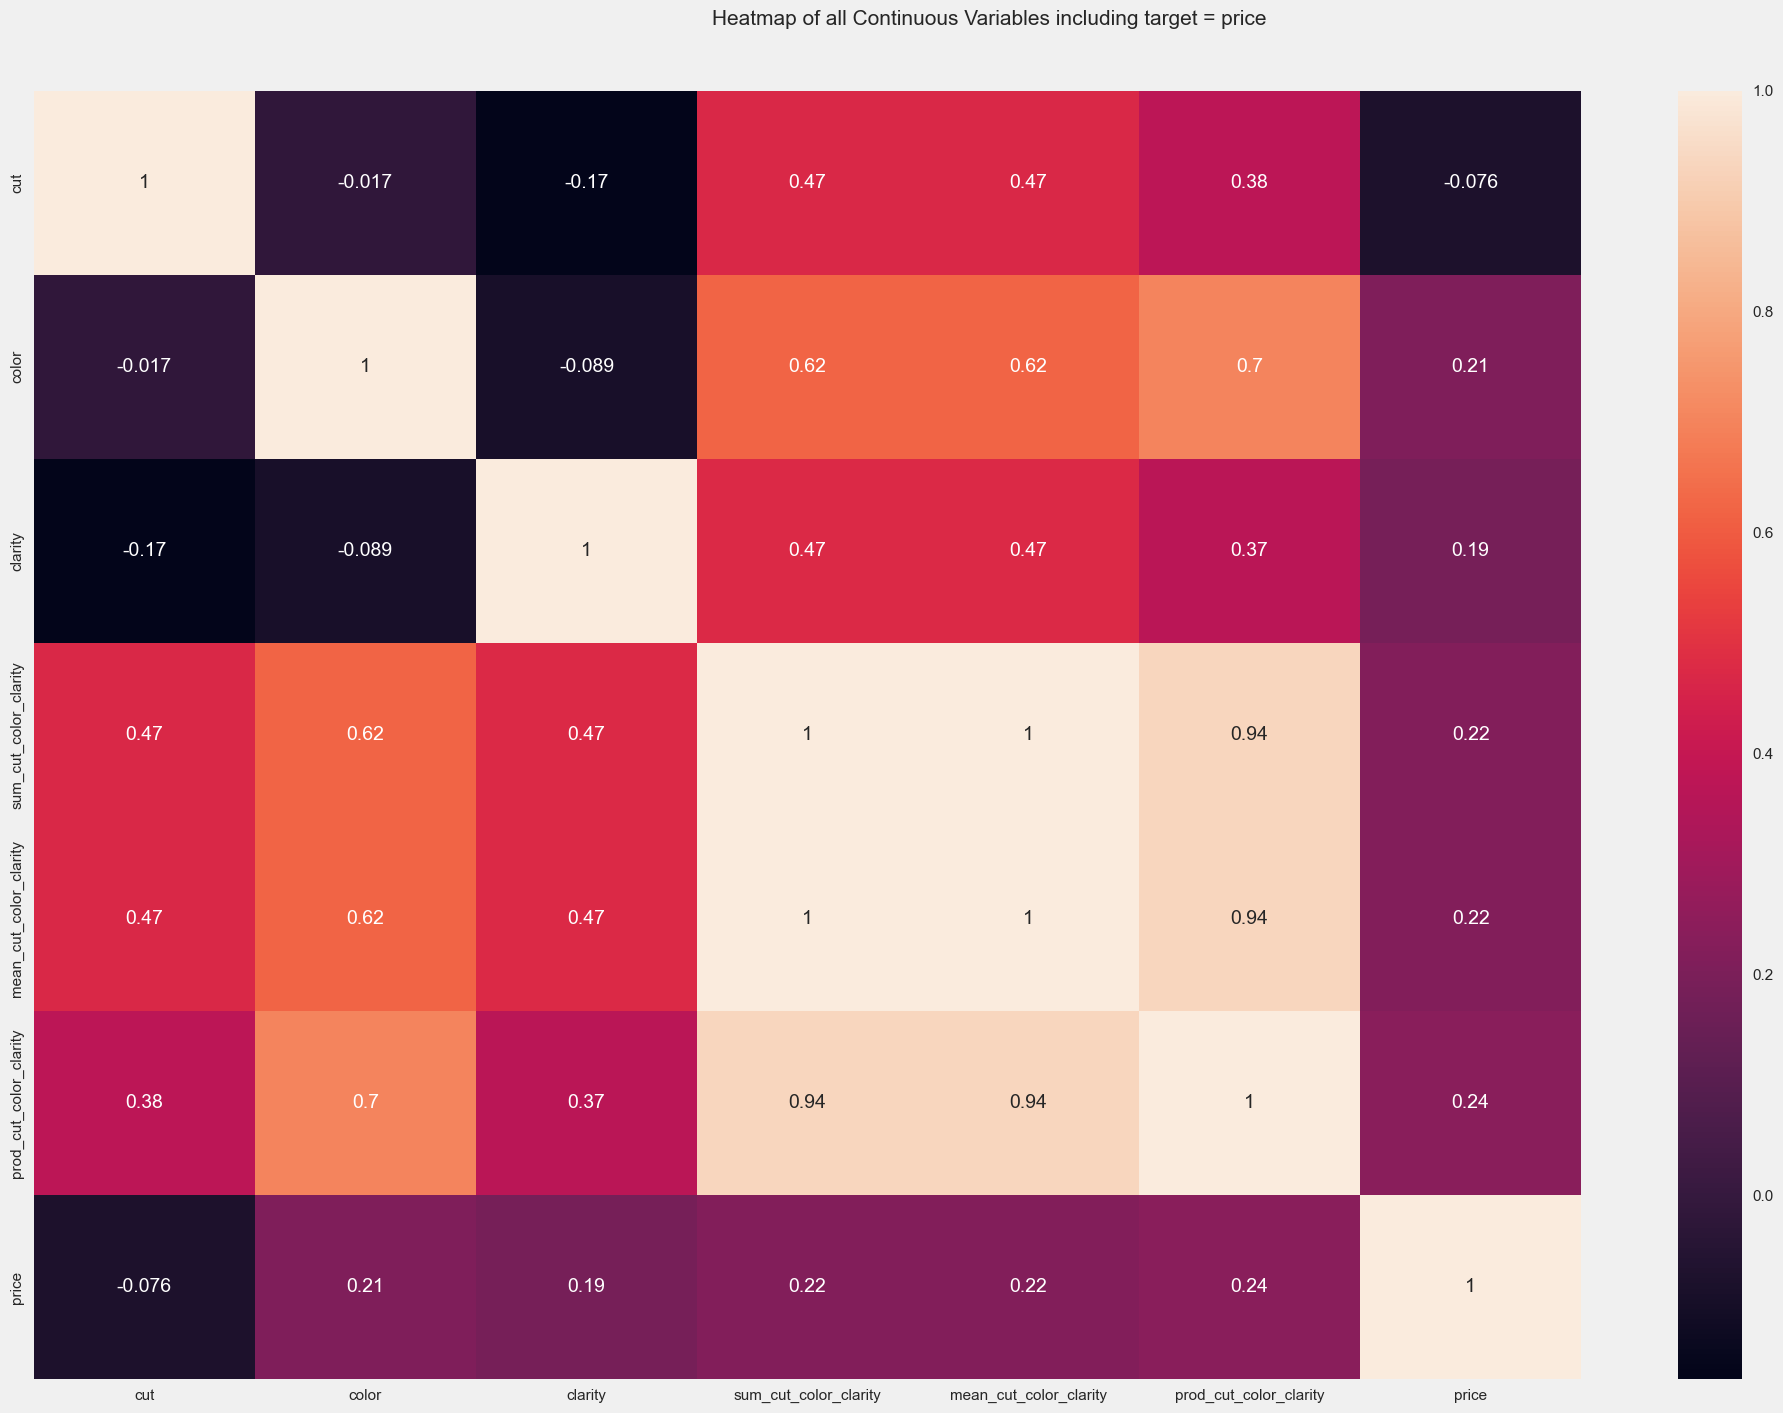

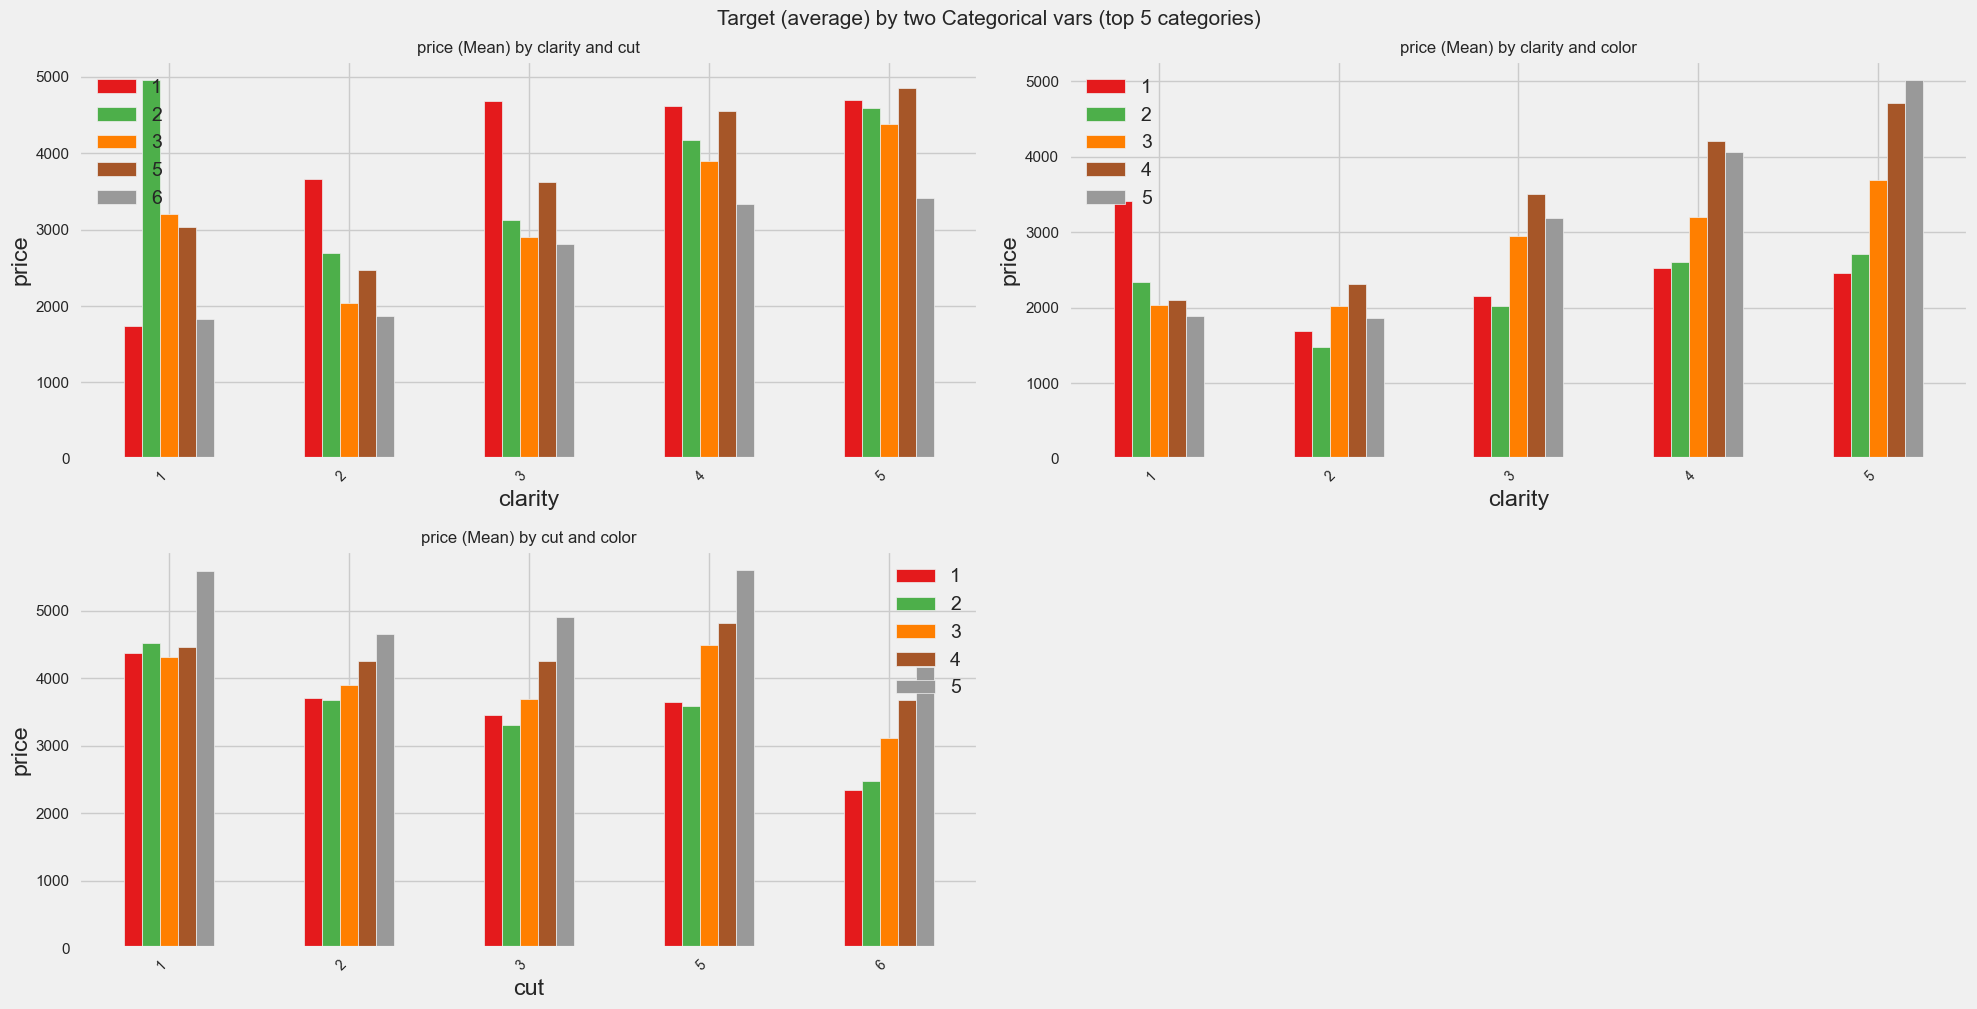

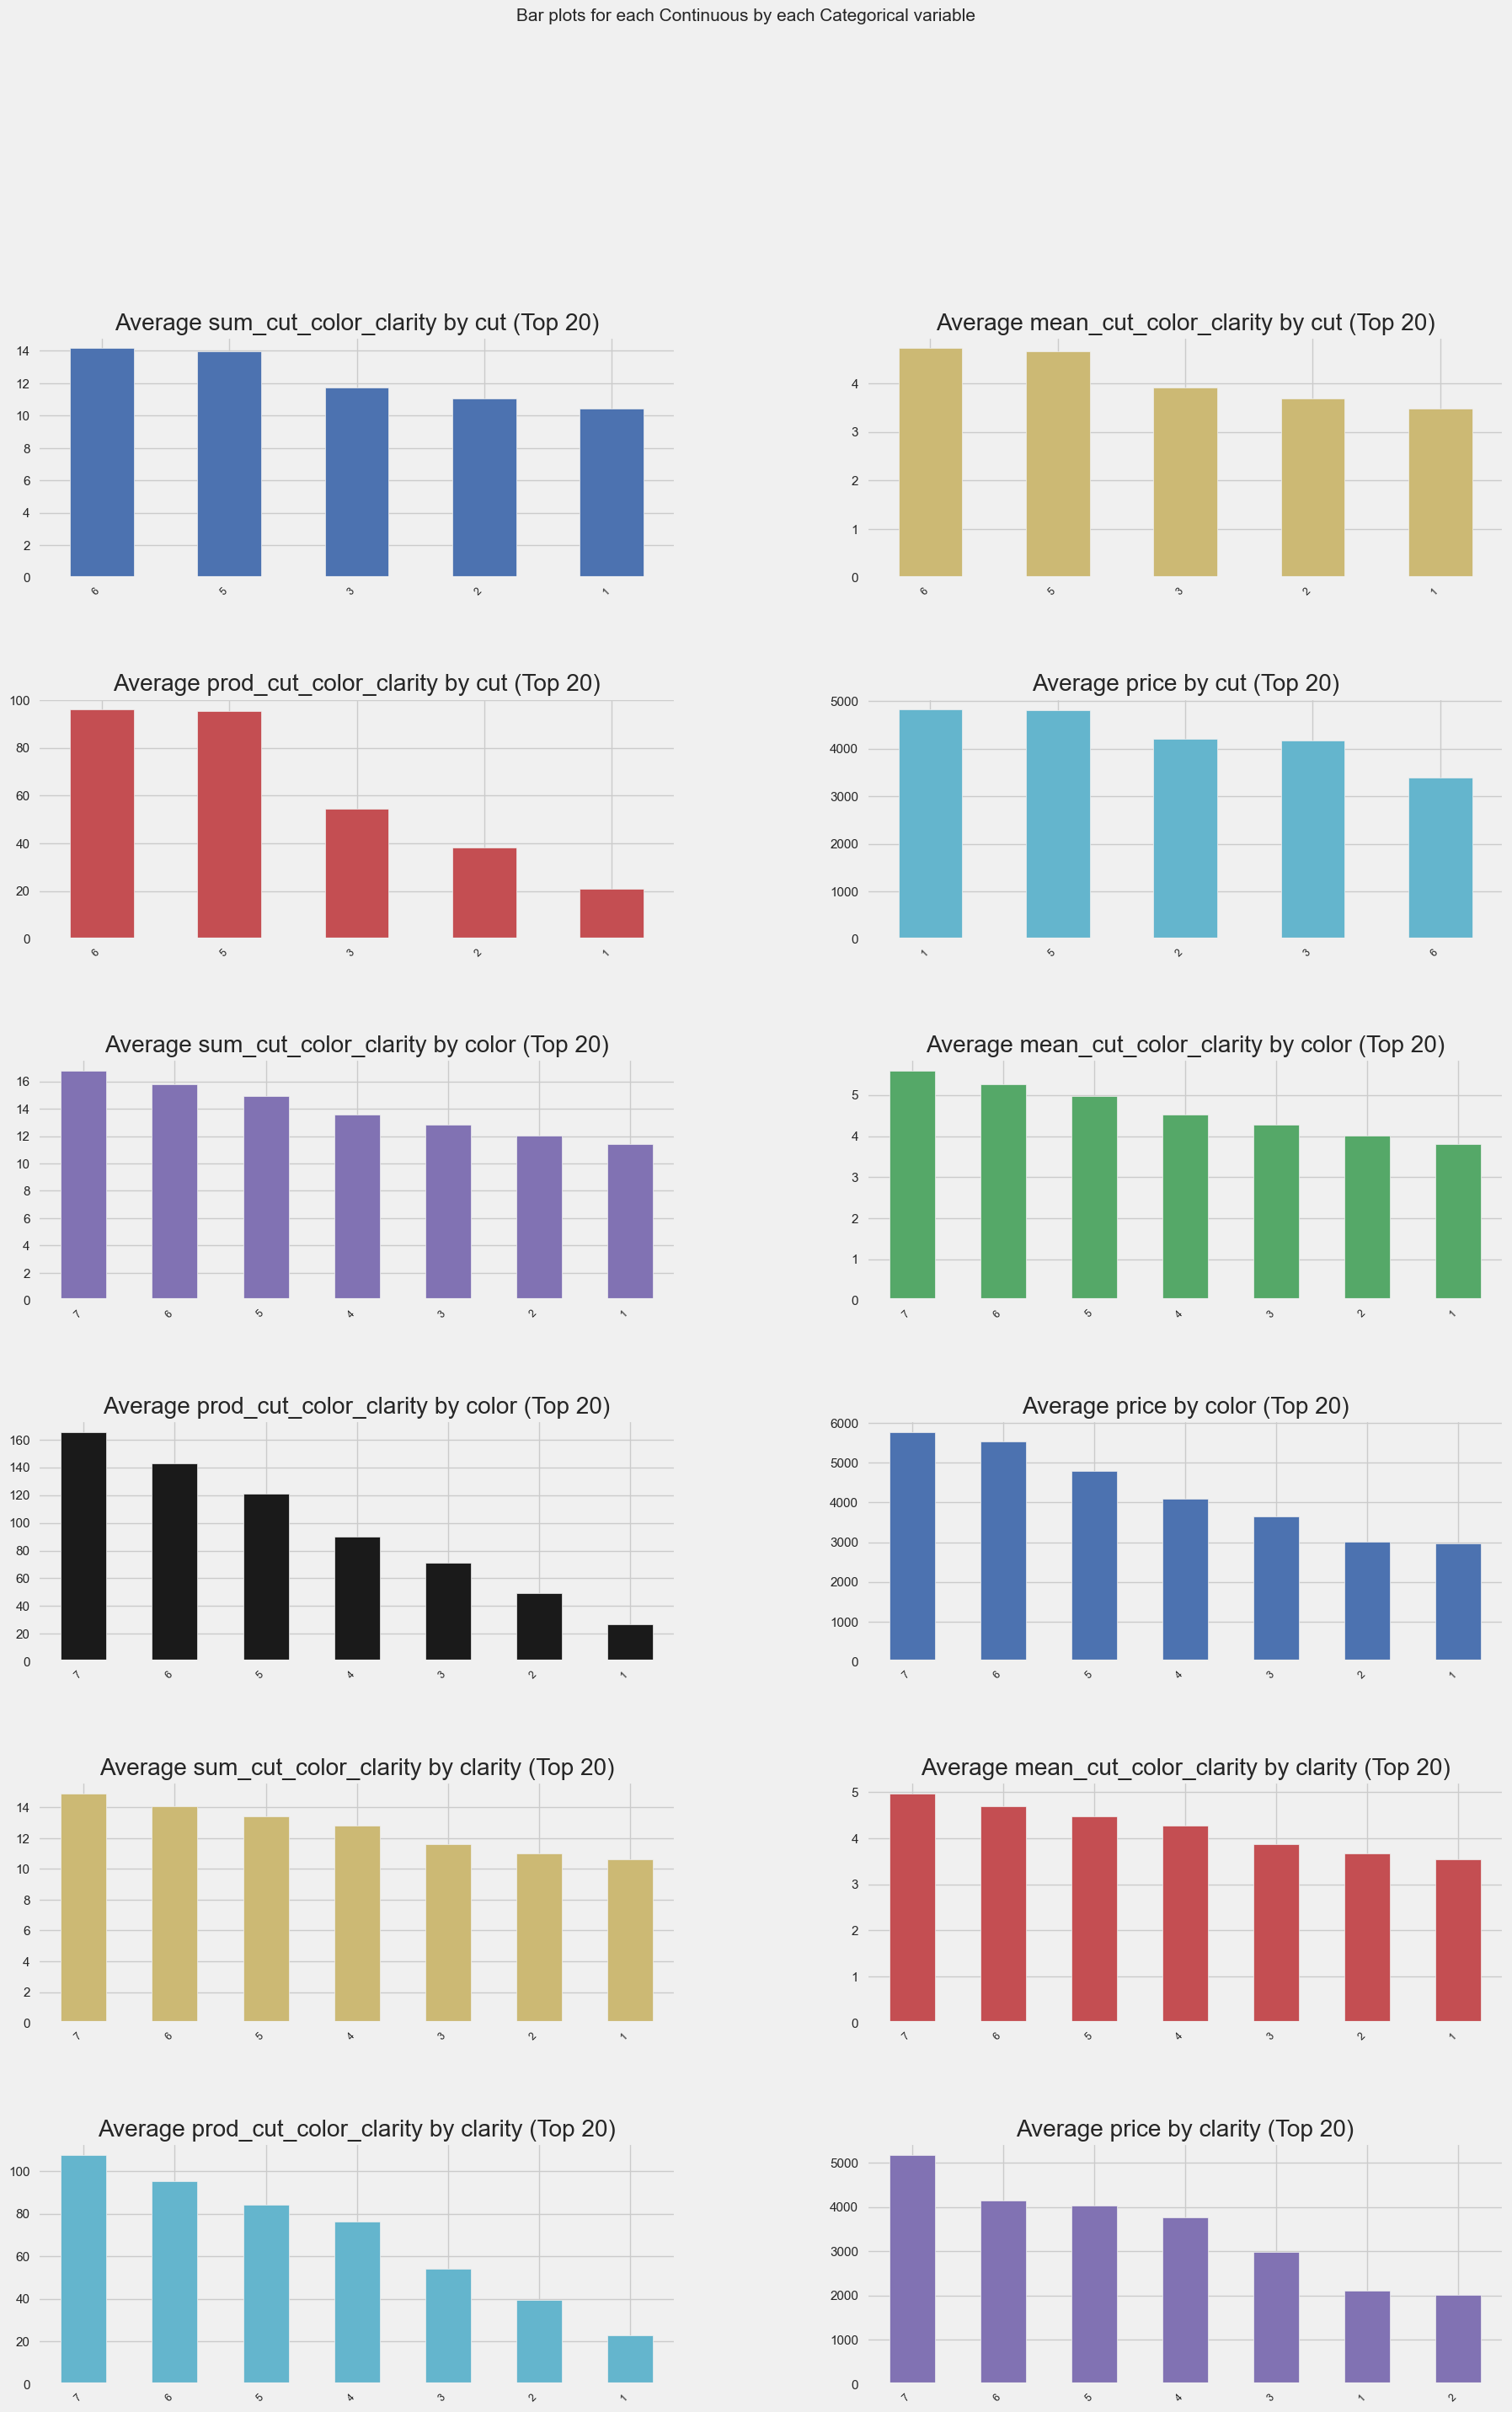

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [22]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[quality_vars + ['sum_cut_color_clarity','mean_cut_color_clarity','prod_cut_color_clarity'] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [23]:
# Shape measurements
shape_vars_top = ["x","y","z"]


shape_transformer_top = MathFeatures(
        variables = shape_vars_top,
        func = "prod")

X = shape_transformer_top.fit_transform(X)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


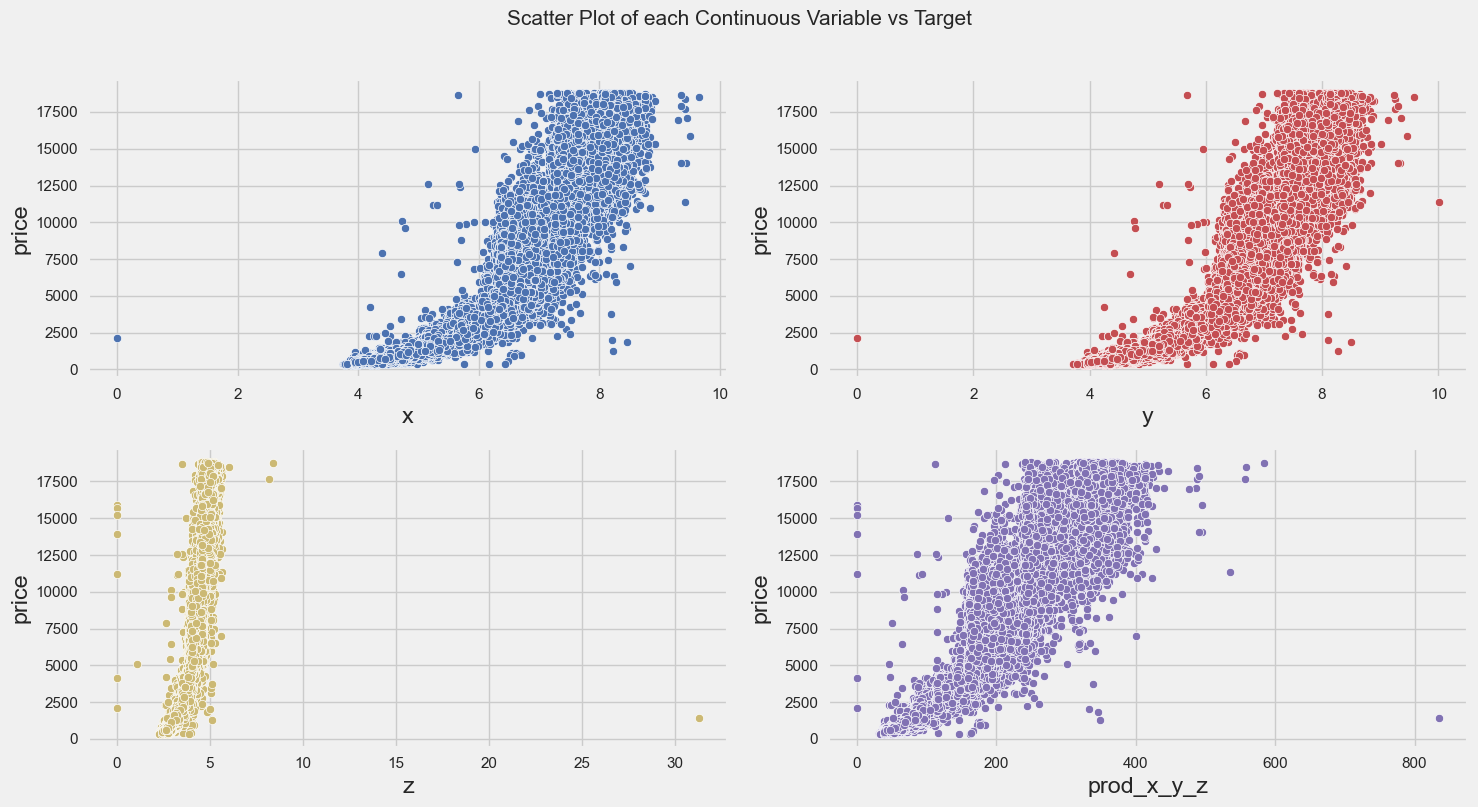

Number of All Scatter Plots = 10


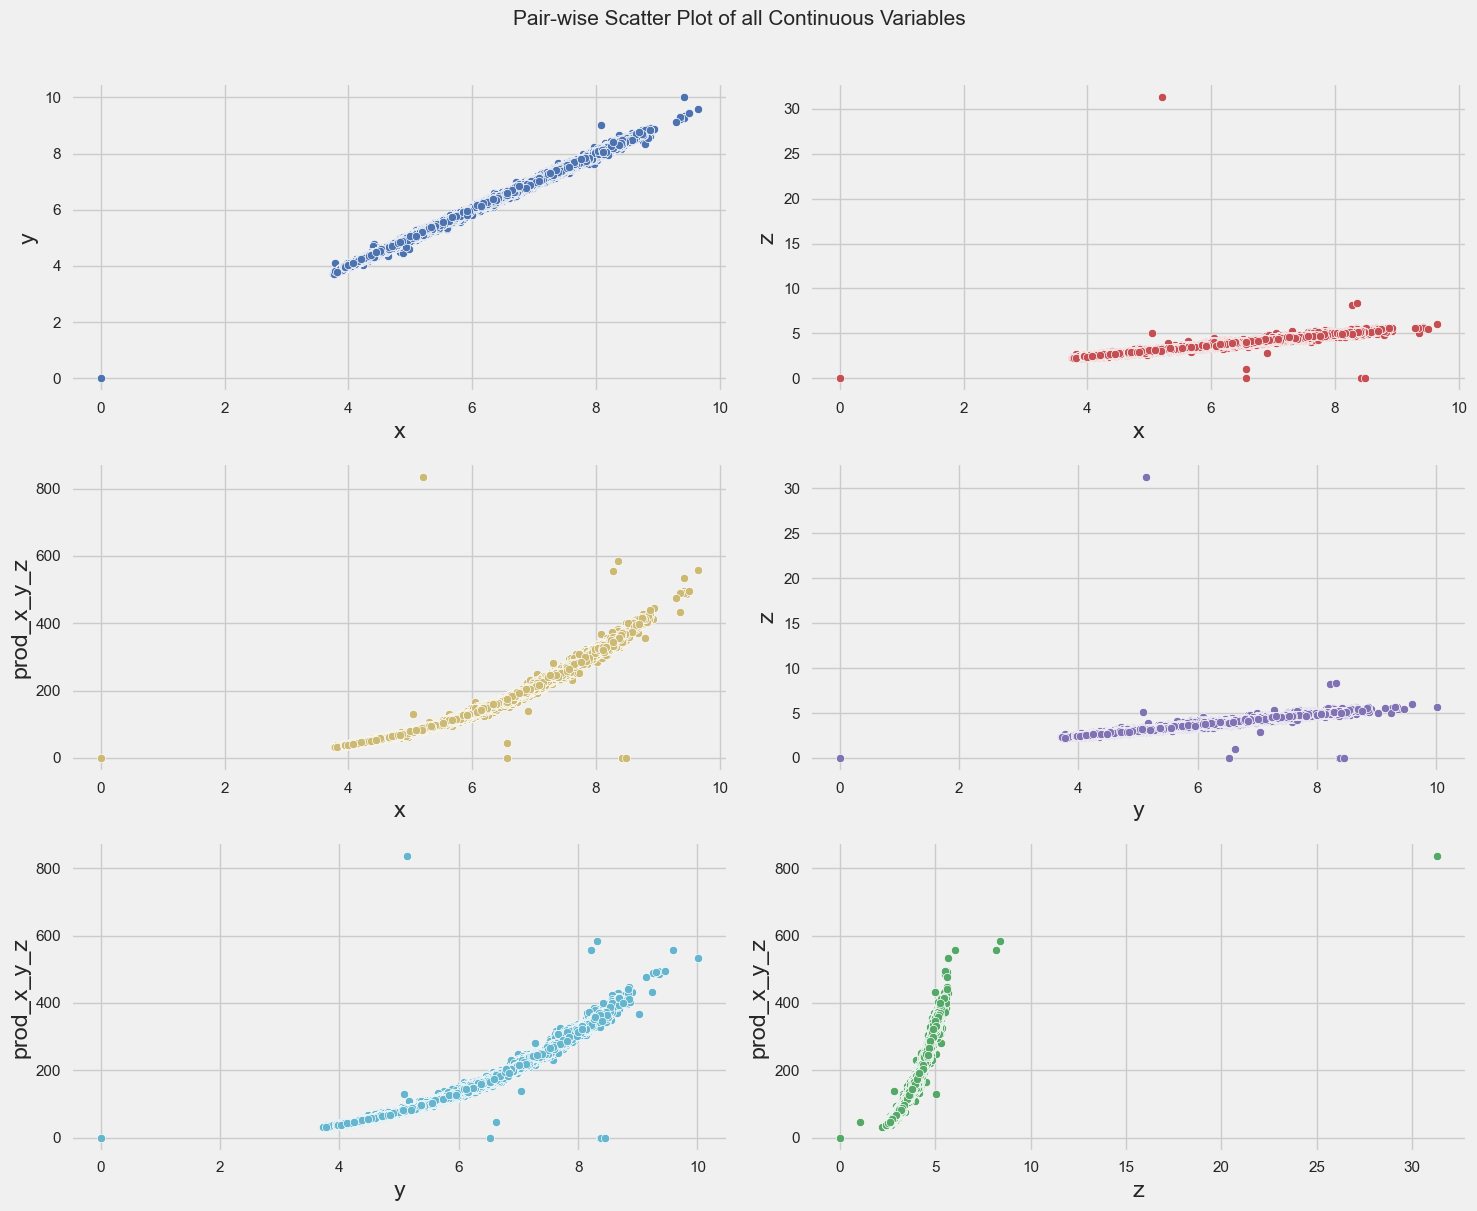

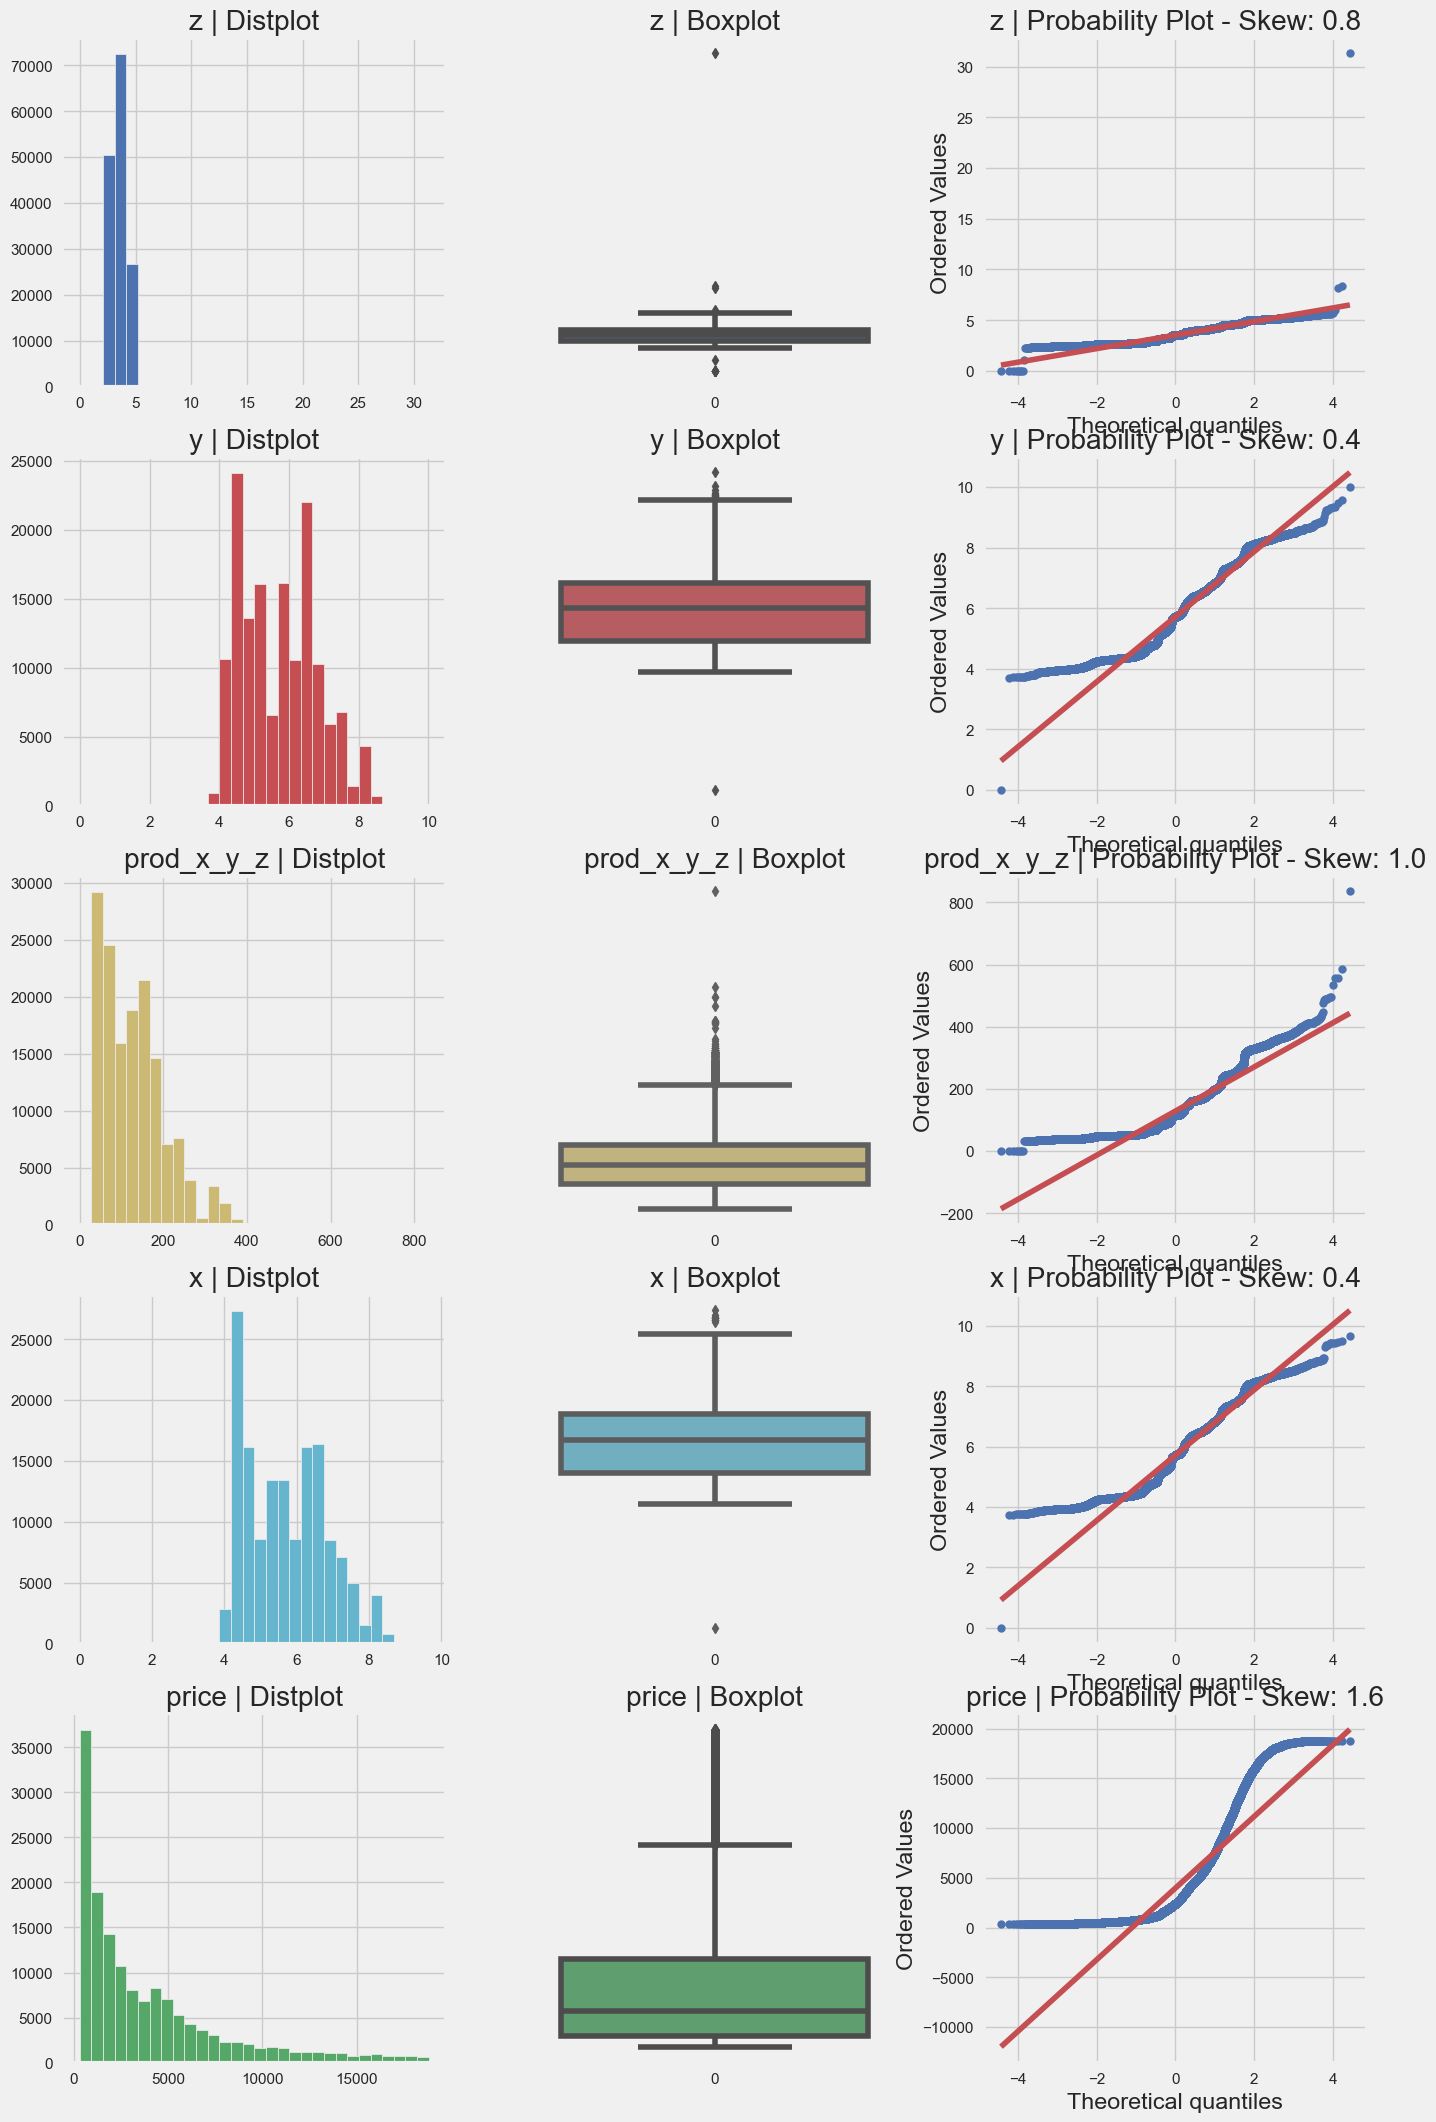

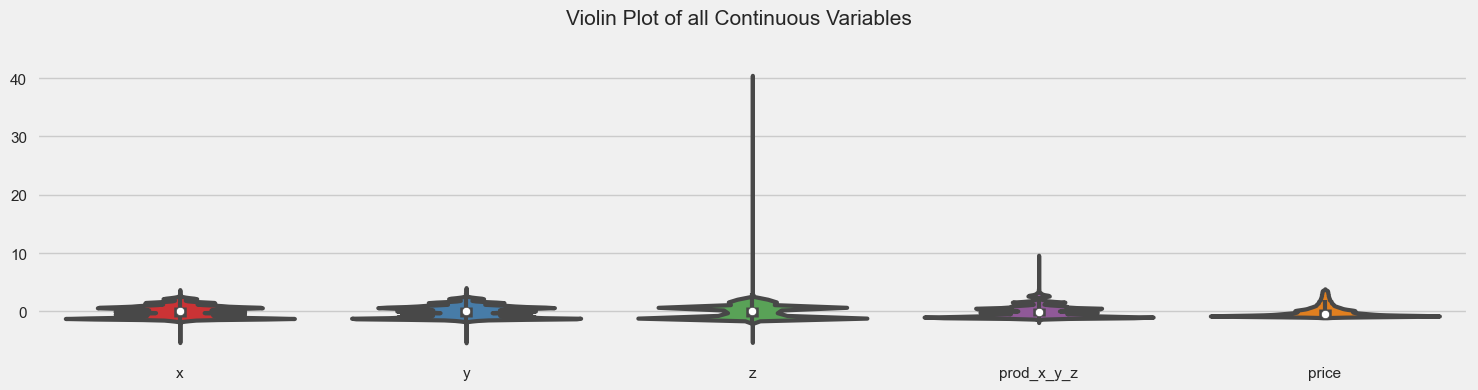

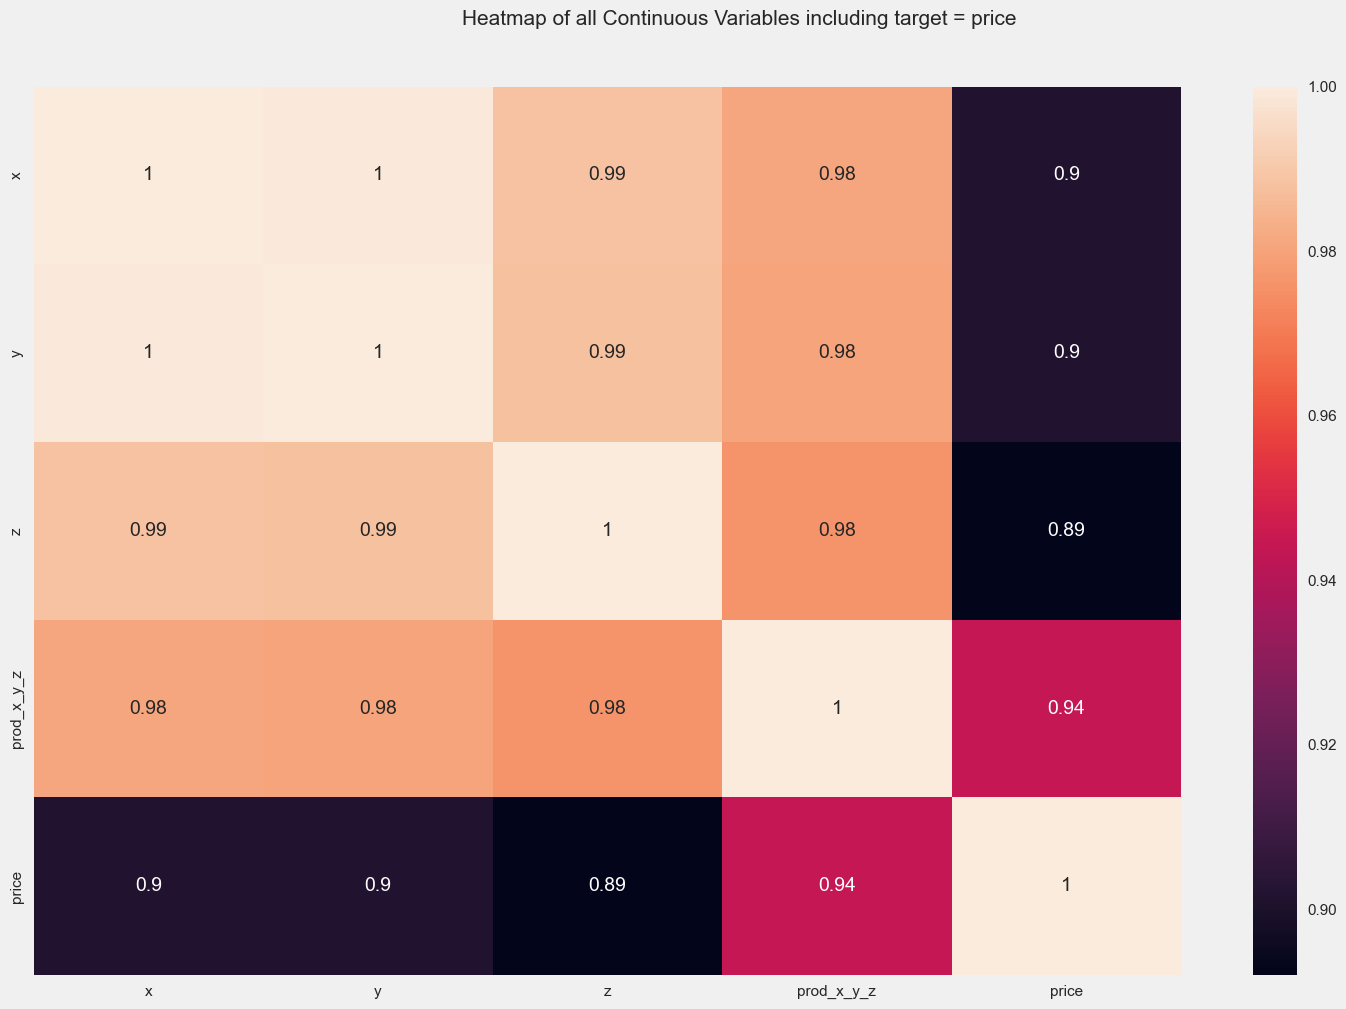

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [24]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[shape_vars_top + ['prod_x_y_z'] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [25]:
# Shape measurements
shape_vars_height = ["depth","table"]


shape_transformer_height = MathFeatures(
        variables = shape_vars_height,
        func = "prod")

X = shape_transformer_height.fit_transform(X)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


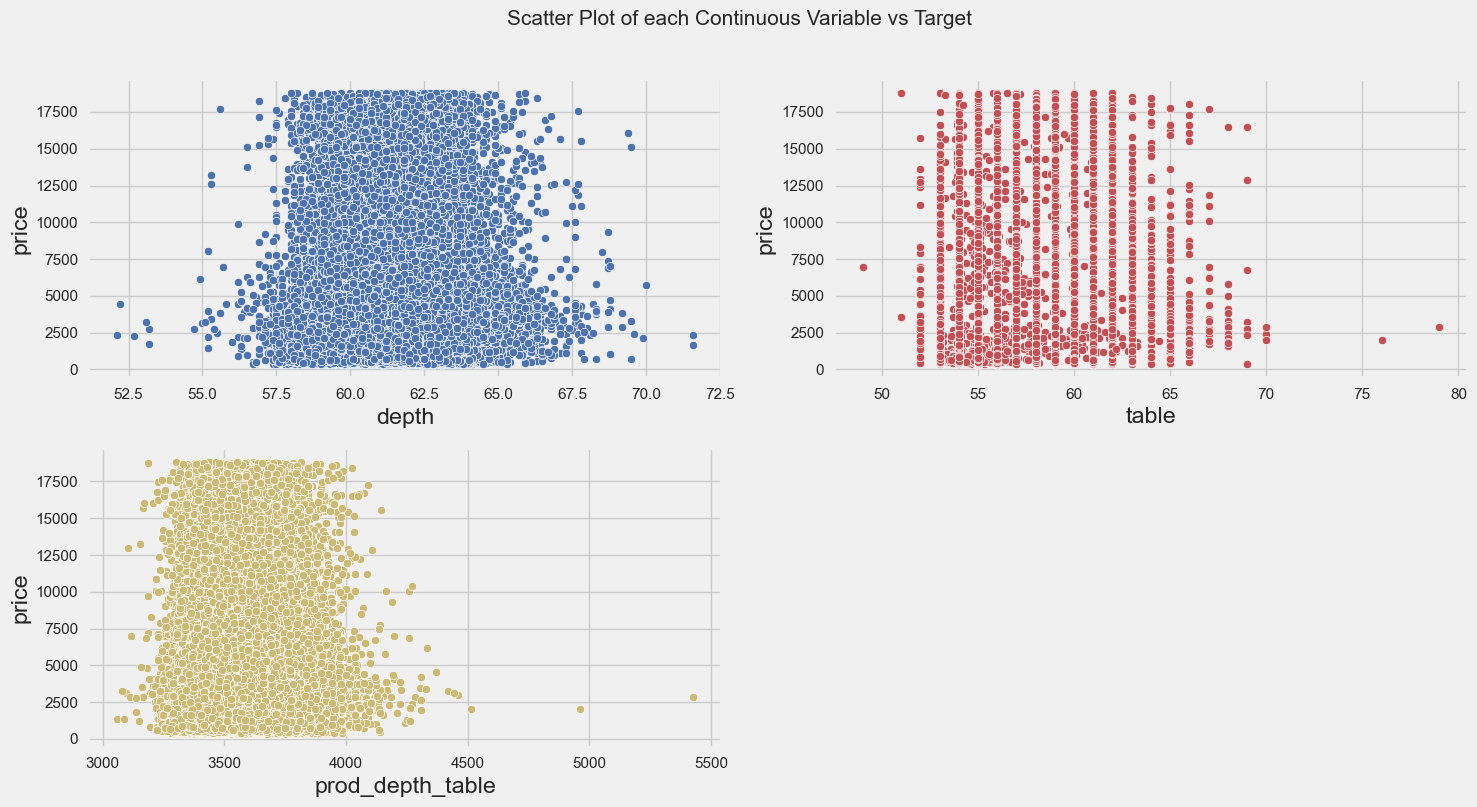

Number of All Scatter Plots = 6


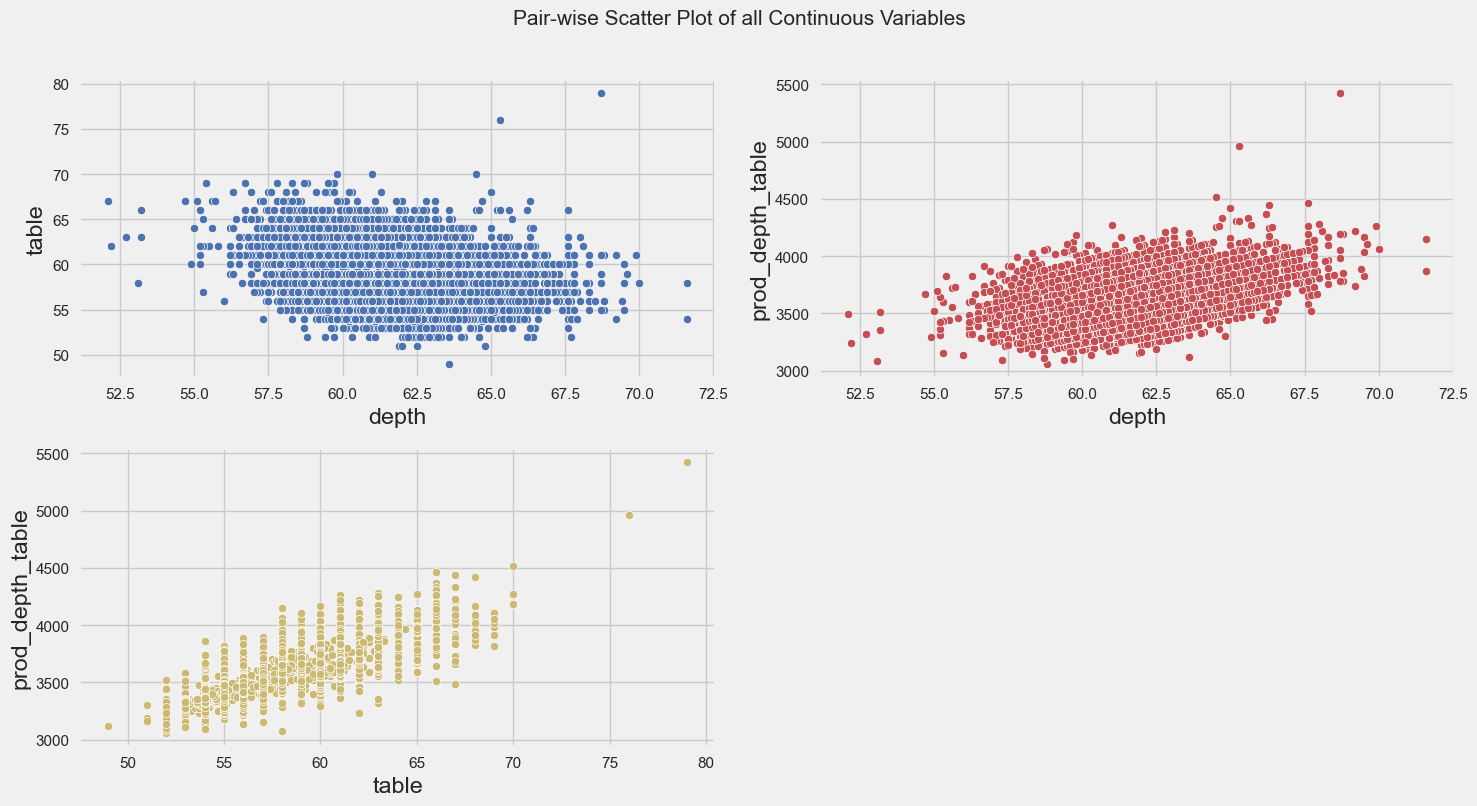

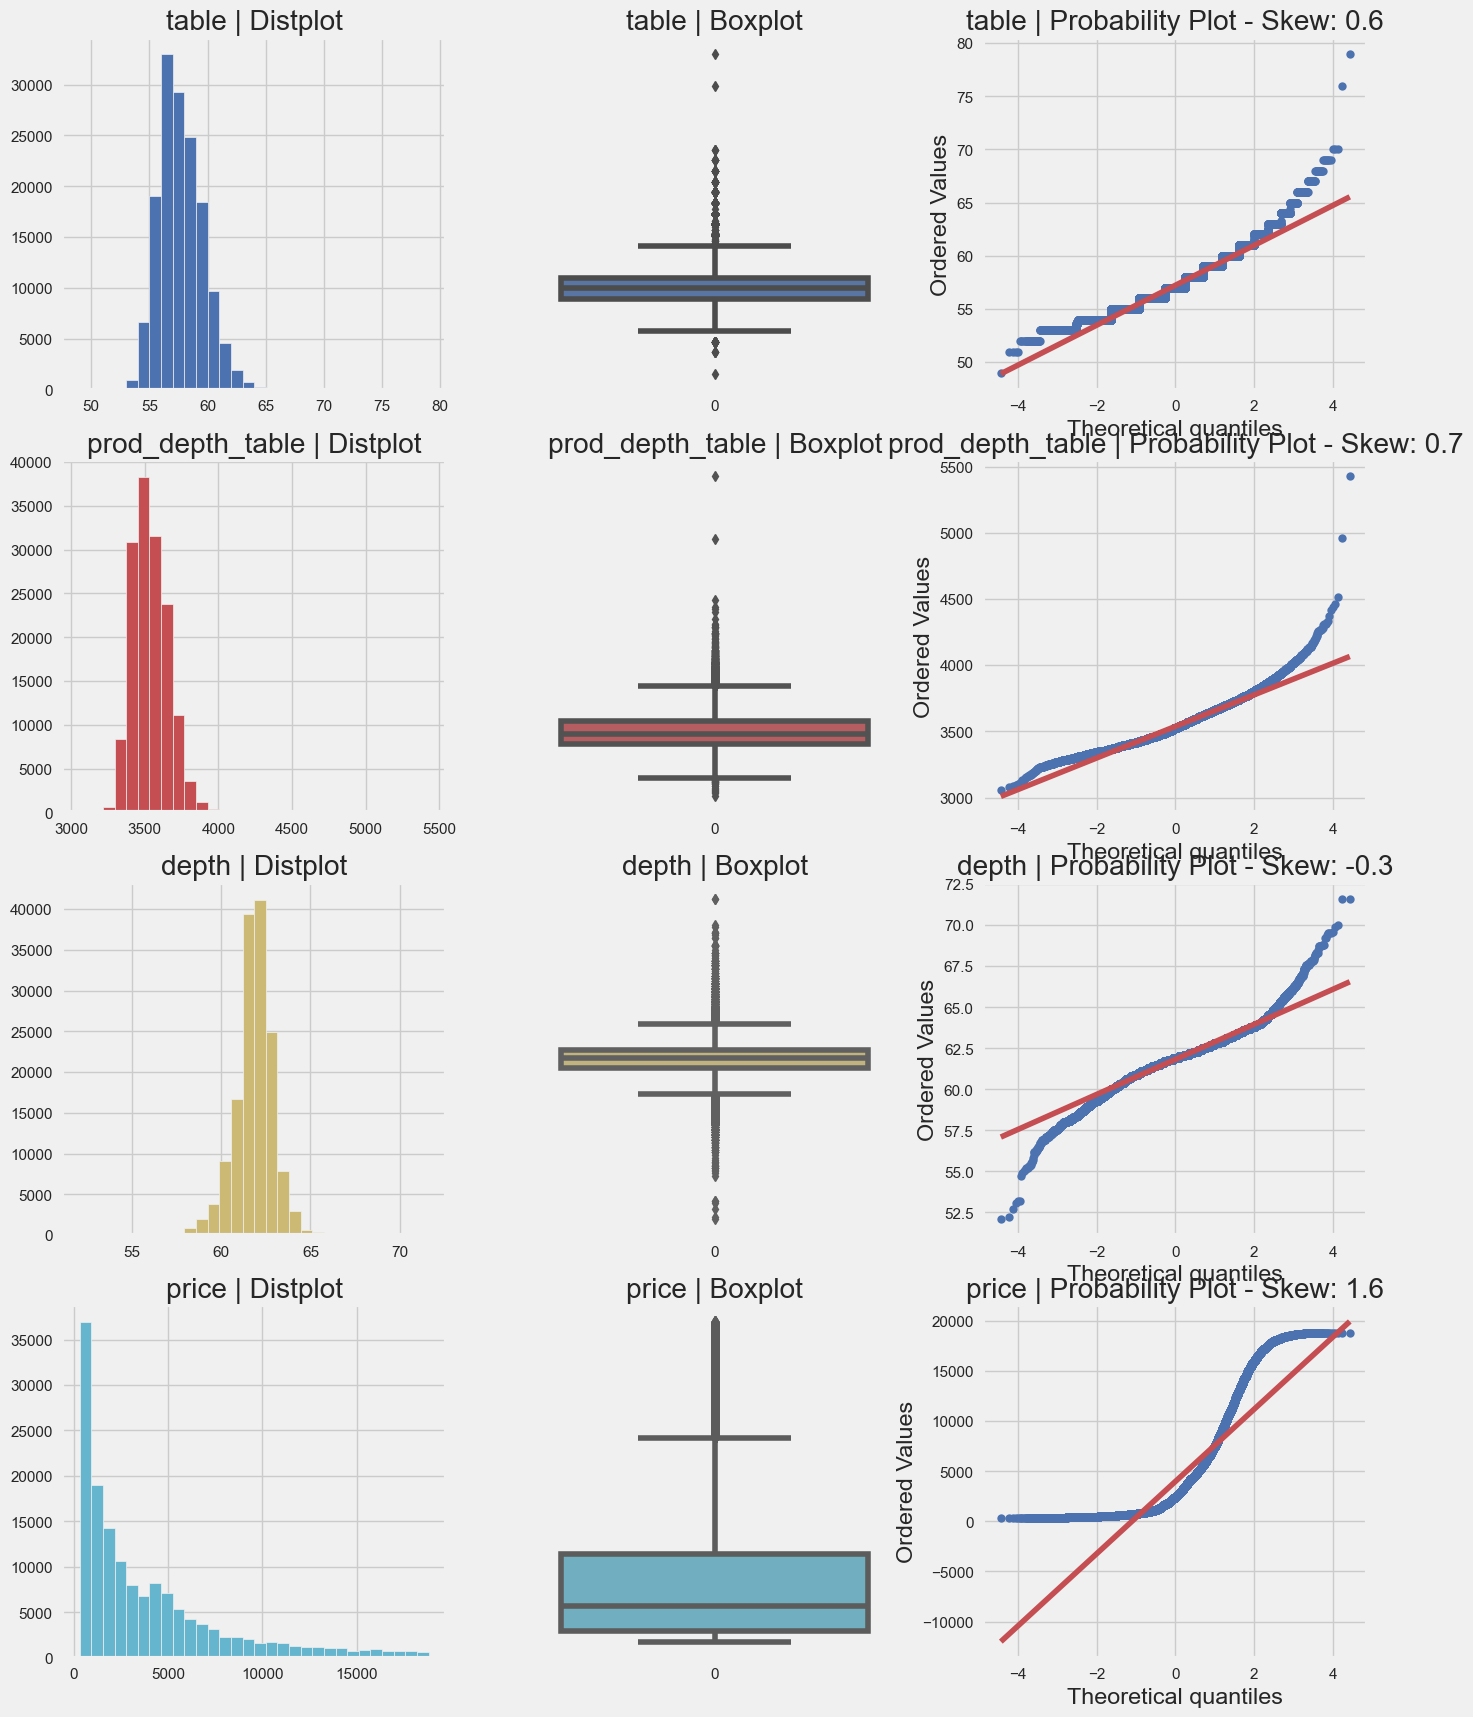

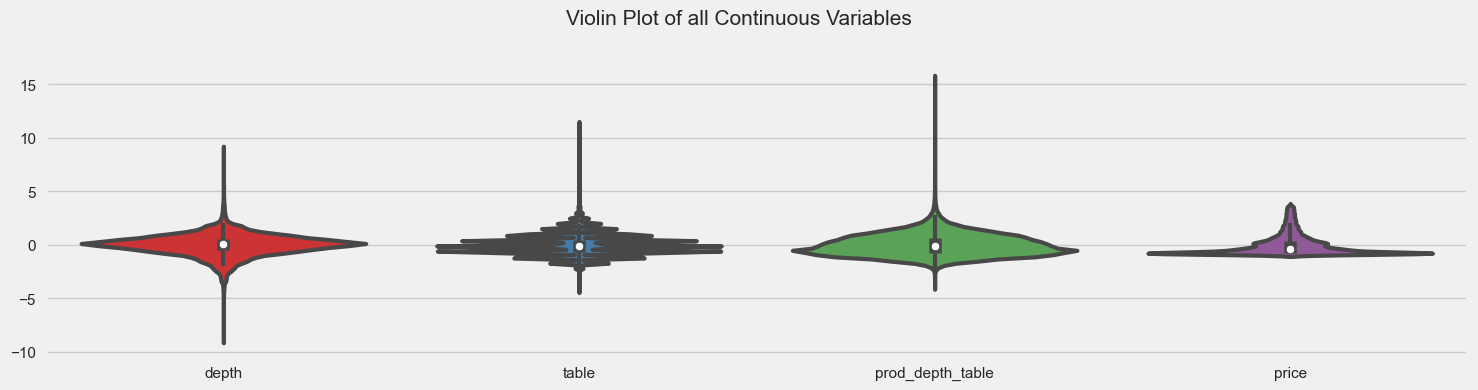

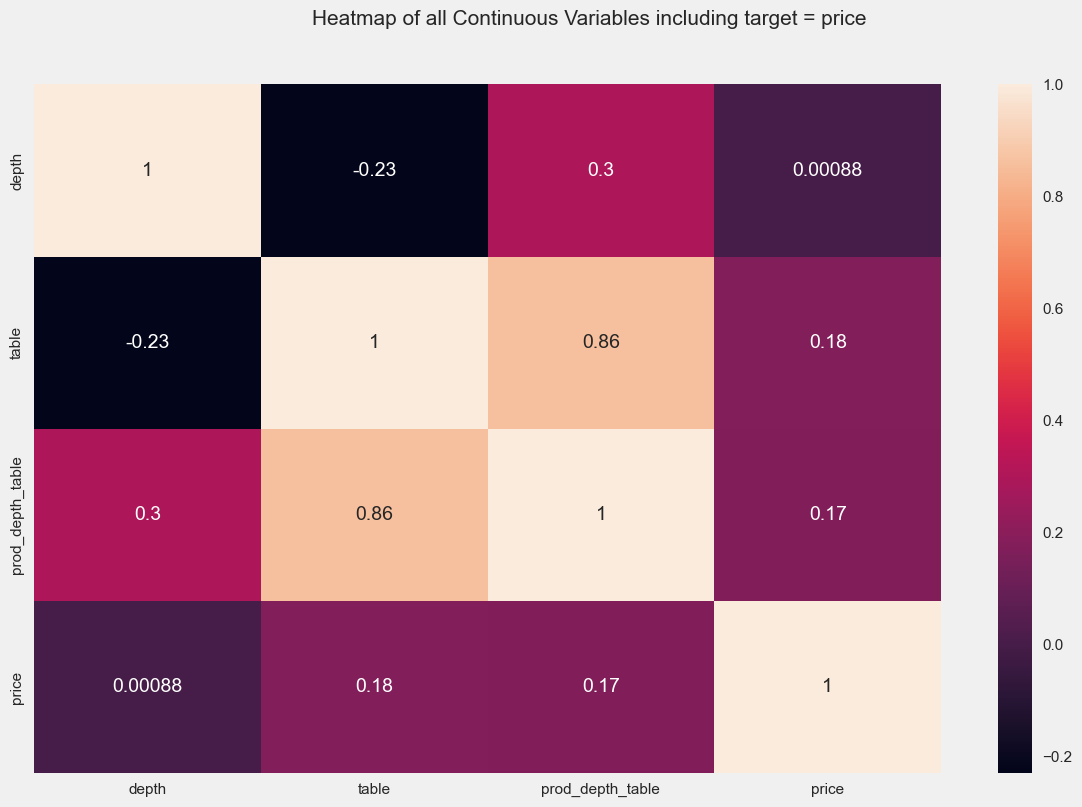

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [26]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[shape_vars_height + ['prod_depth_table'] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [27]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z  \
0  0.555290    5      3        5   62.2   58.0  7.27  7.33  4.55   
1  0.609005    3      7        7   62.0   58.0  8.06  8.12  5.05   
2  0.391096    6      4        4   61.2   57.0  5.69  5.73  3.50   
3  0.235654    6      4        4   61.6   56.0  4.38  4.41  2.71   
4  0.576819    5      4        5   62.6   59.0  7.65  7.61  4.77   

   sum_cut_color_clarity  mean_cut_color_clarity  prod_cut_color_clarity  \
0                   13.0                4.333333                    75.0   
1                   17.0                5.666667                   147.0   
2                   14.0                4.666667                    96.0   
3                   14.0                4.666667                    96.0   
4                   14.0                4.666667                   100.0   

   prod_x_y_z  prod_depth_table  
0  242.465405            3607.6  
1  330.508360            3596.0  
2  114.112950            3488.4  
3   52.345818            3449.6  
4  277.692705            3693.4

In [28]:
# Shape measurements
shape_vars_total = ["prod_x_y_z","prod_depth_table"]


shape_transformer_total = MathFeatures(
        variables = shape_vars_total,
        func = "prod")

X = shape_transformer_total.fit_transform(X)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


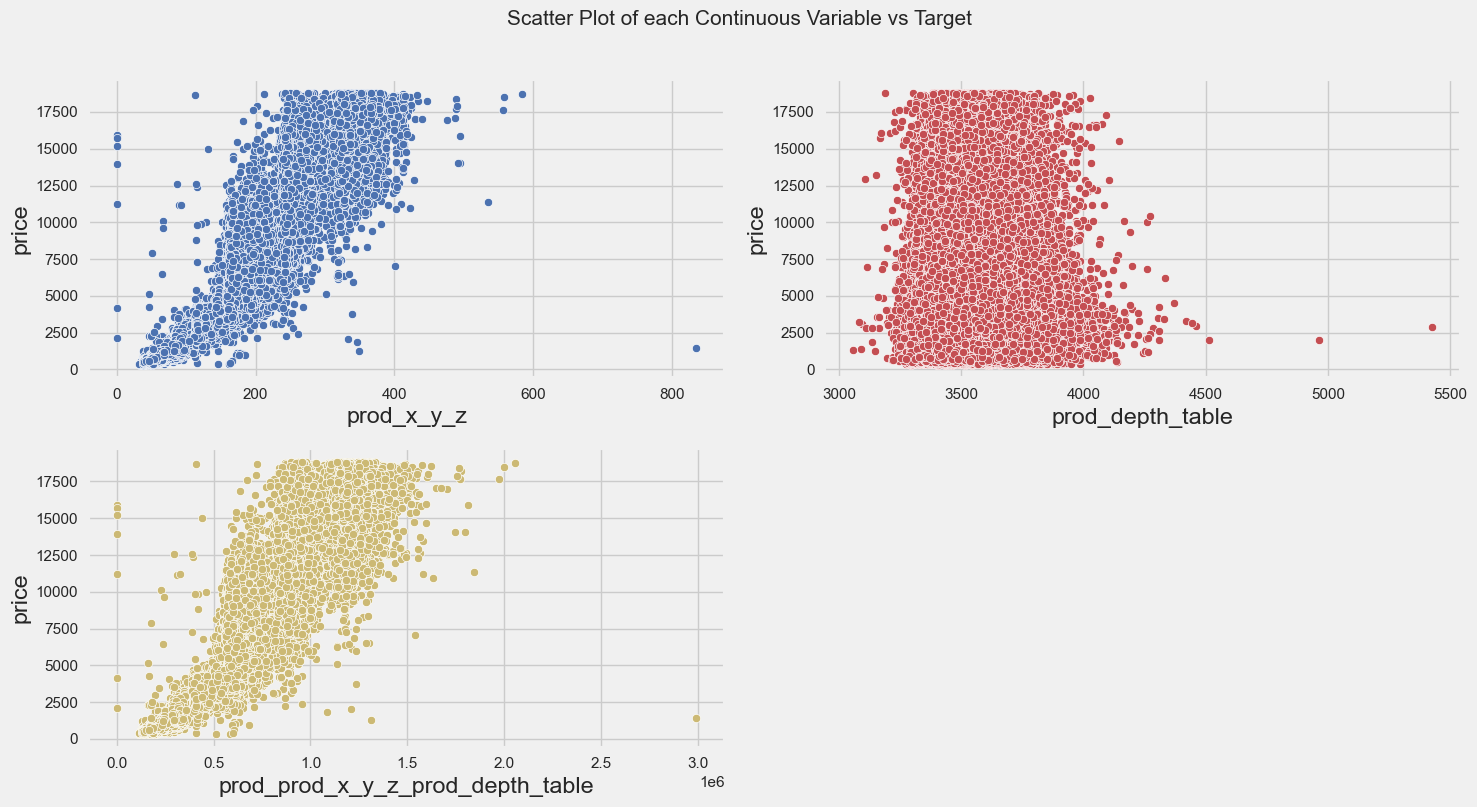

Number of All Scatter Plots = 6


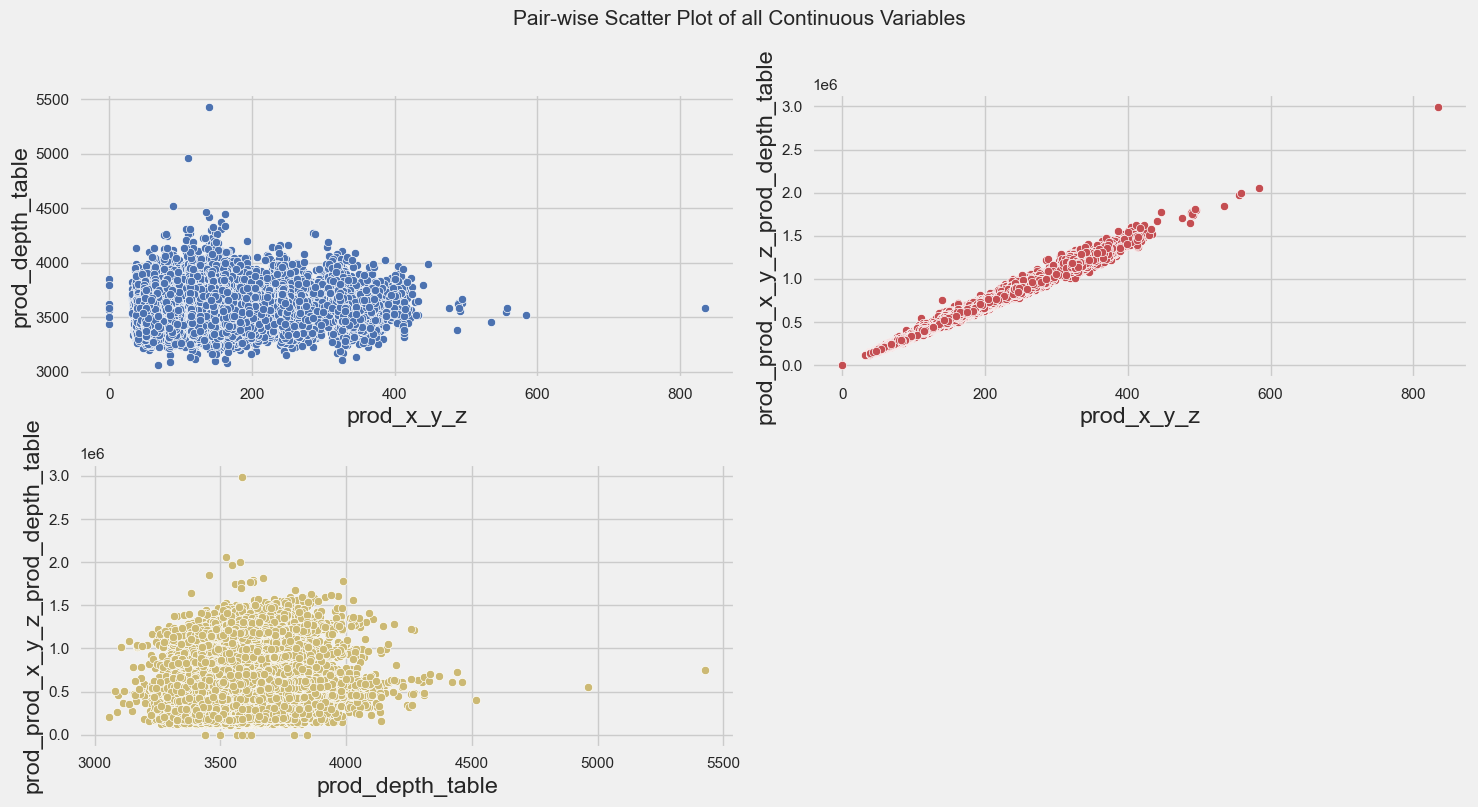

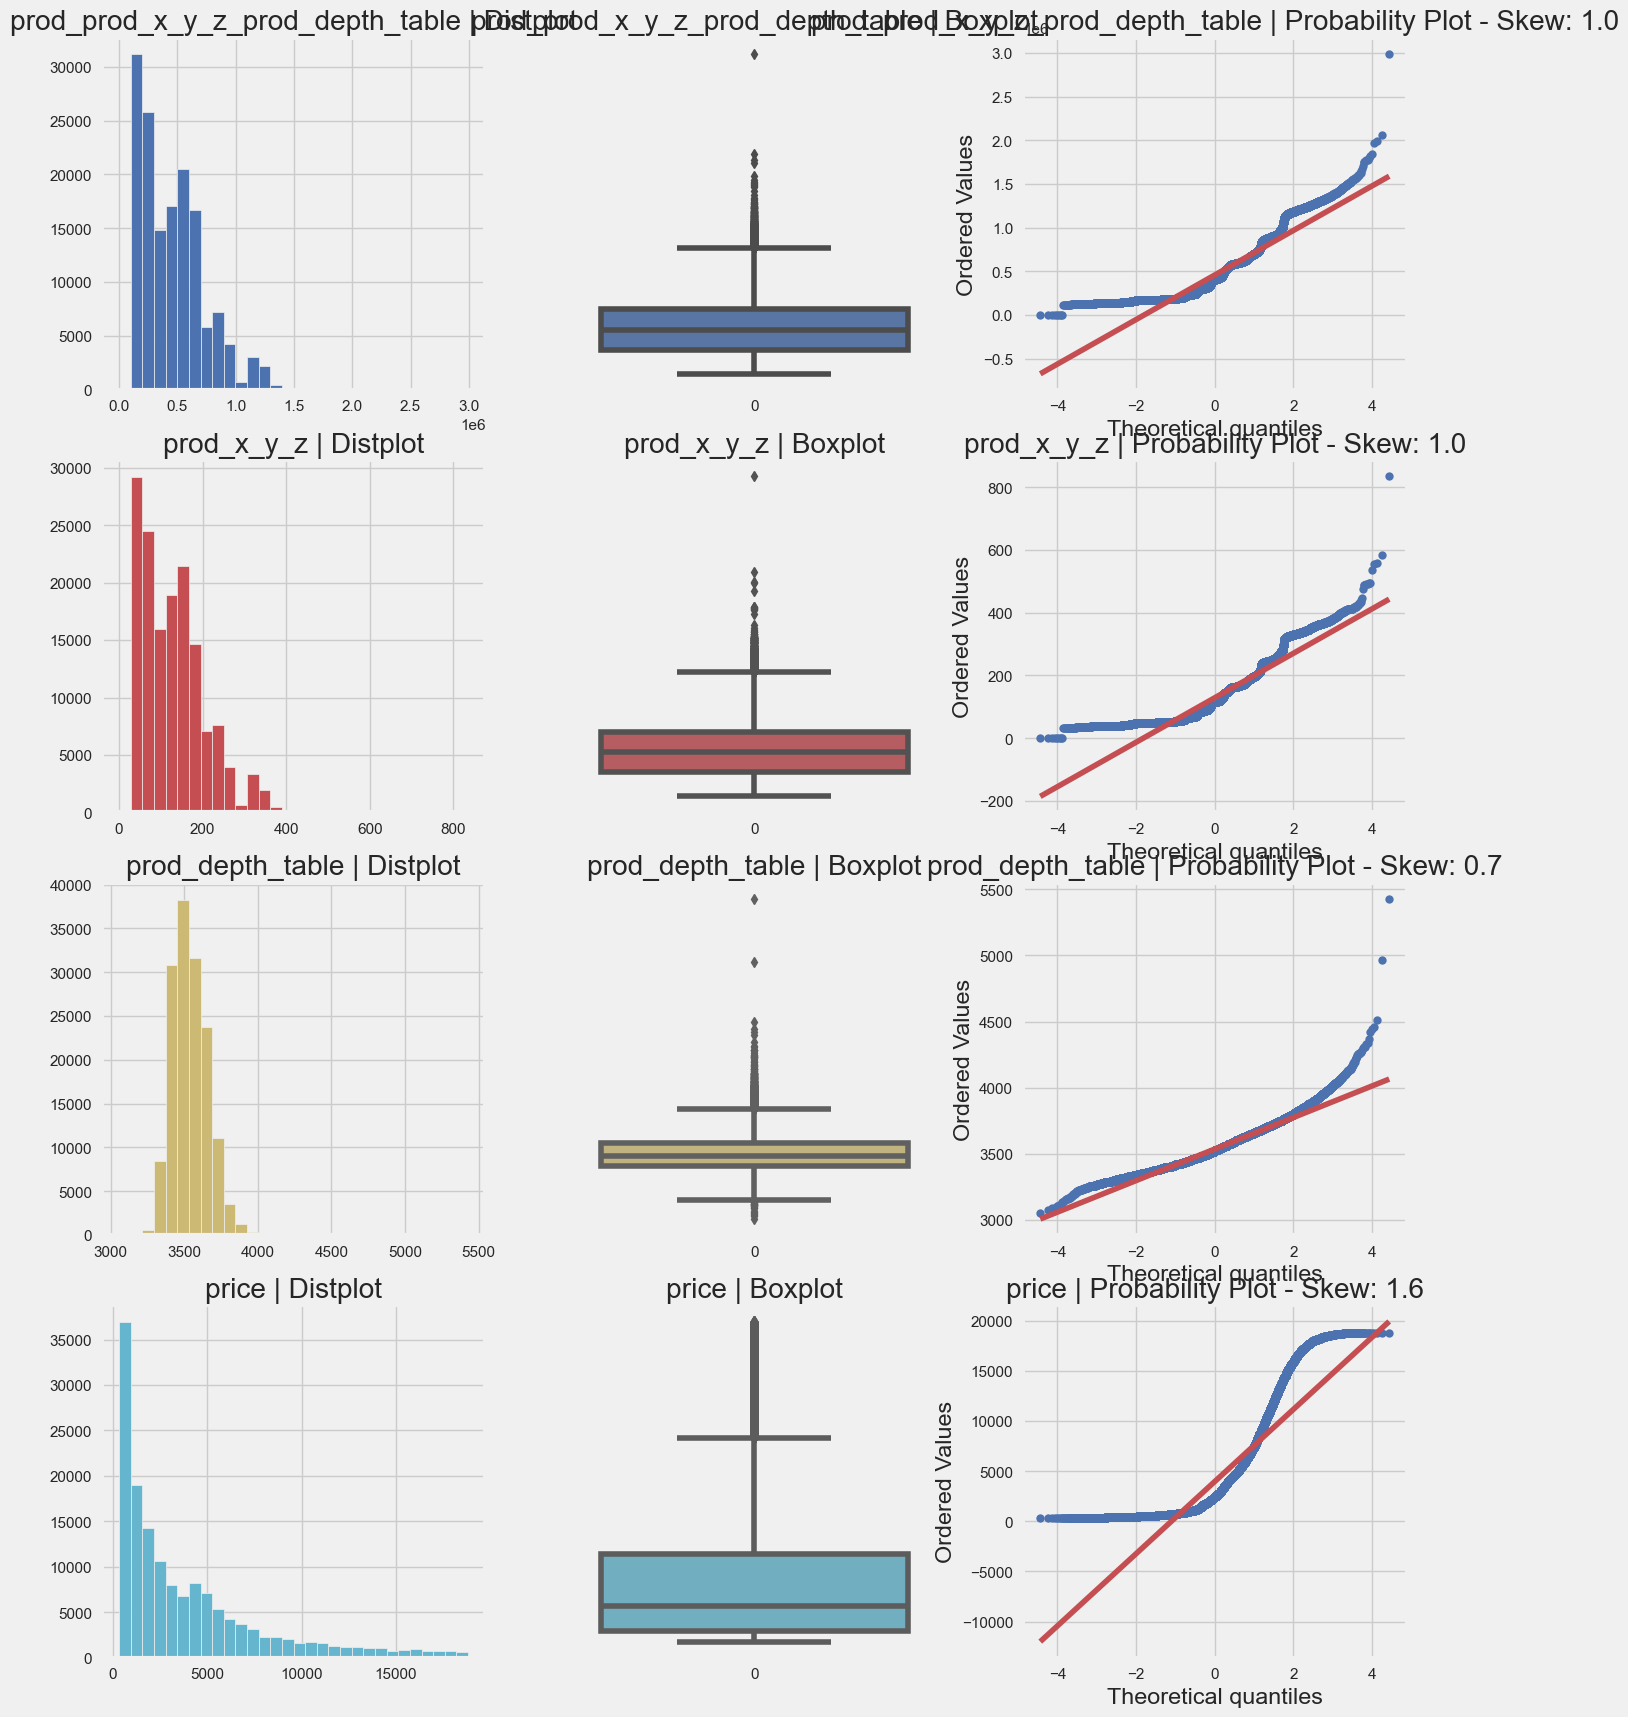

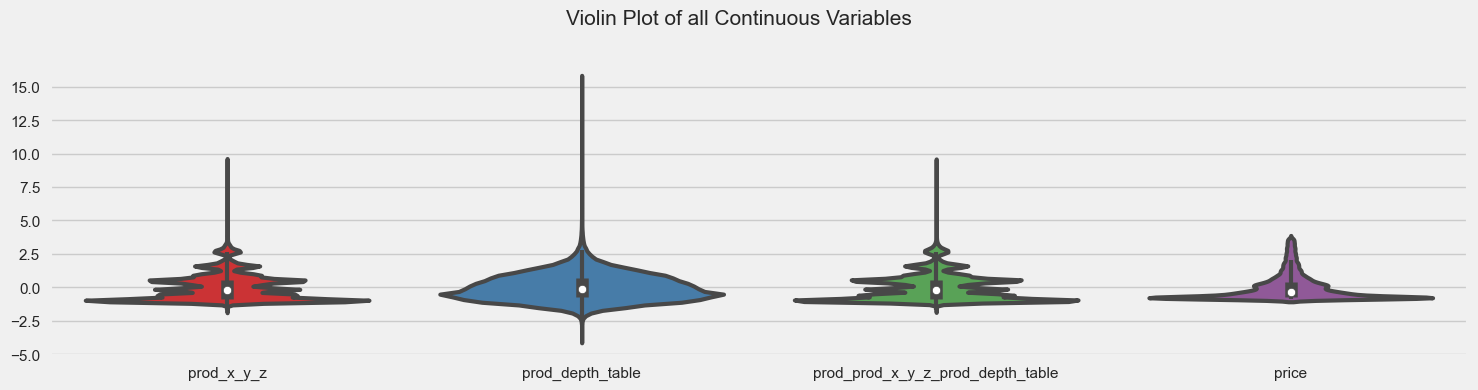

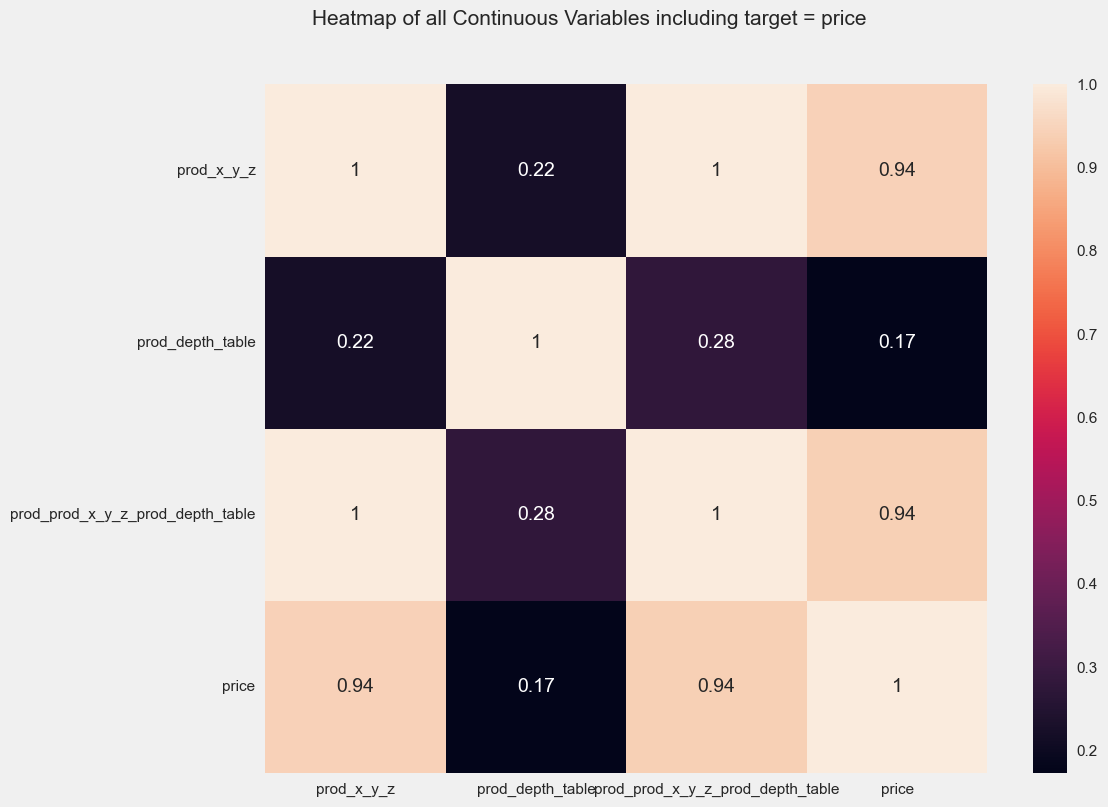

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [29]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[shape_vars_total + ['prod_prod_x_y_z_prod_depth_table'] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [30]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z  \
0  0.555290    5      3        5   62.2   58.0  7.27  7.33  4.55   
1  0.609005    3      7        7   62.0   58.0  8.06  8.12  5.05   
2  0.391096    6      4        4   61.2   57.0  5.69  5.73  3.50   
3  0.235654    6      4        4   61.6   56.0  4.38  4.41  2.71   
4  0.576819    5      4        5   62.6   59.0  7.65  7.61  4.77   

   sum_cut_color_clarity  mean_cut_color_clarity  prod_cut_color_clarity  \
0                   13.0                4.333333                    75.0   
1                   17.0                5.666667                   147.0   
2                   14.0                4.666667                    96.0   
3                   14.0                4.666667                    96.0   
4                   14.0                4.666667                   100.0   

   prod_x_y_z  prod_depth_table  prod_prod_x_y_z_prod_depth_table  
0  242.465405            3607.6                      8.747182e+05  
1  330.508360            3596.0                      1.188508e+06  
2  114.112950            3488.4                      3.980716e+05  
3   52.345818            3449.6                      1.805721e+05  
4  277.692705            3693.4                      1.025630e+06

In [31]:
shape_and_weight_vars = ["carat","prod_prod_x_y_z_prod_depth_table"]


shape_and_weight_transformer_total = MathFeatures(
        variables = shape_and_weight_vars,
        func = "prod")

X = shape_and_weight_transformer_total.fit_transform(X)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


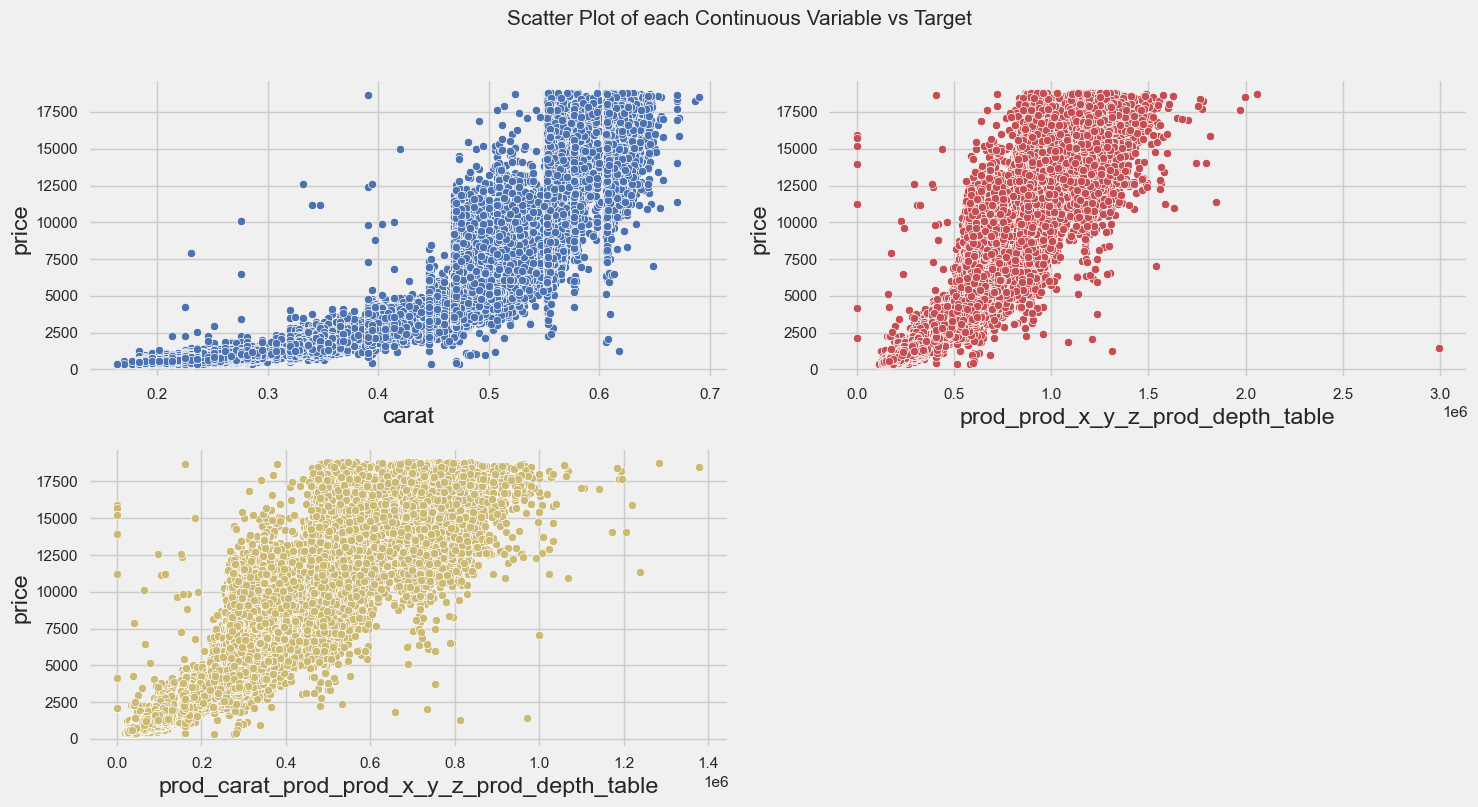

Number of All Scatter Plots = 6


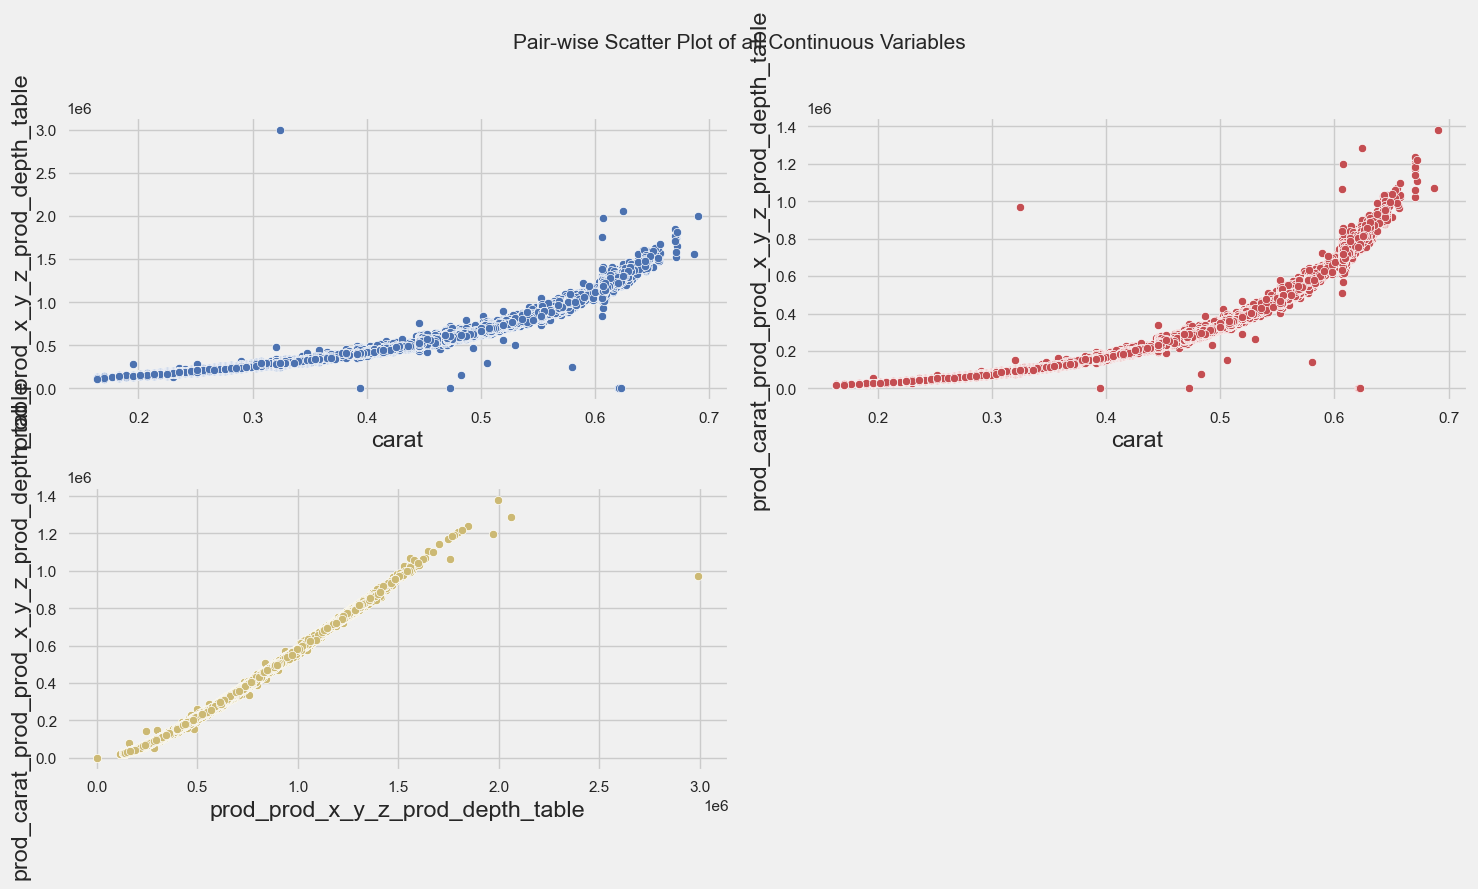

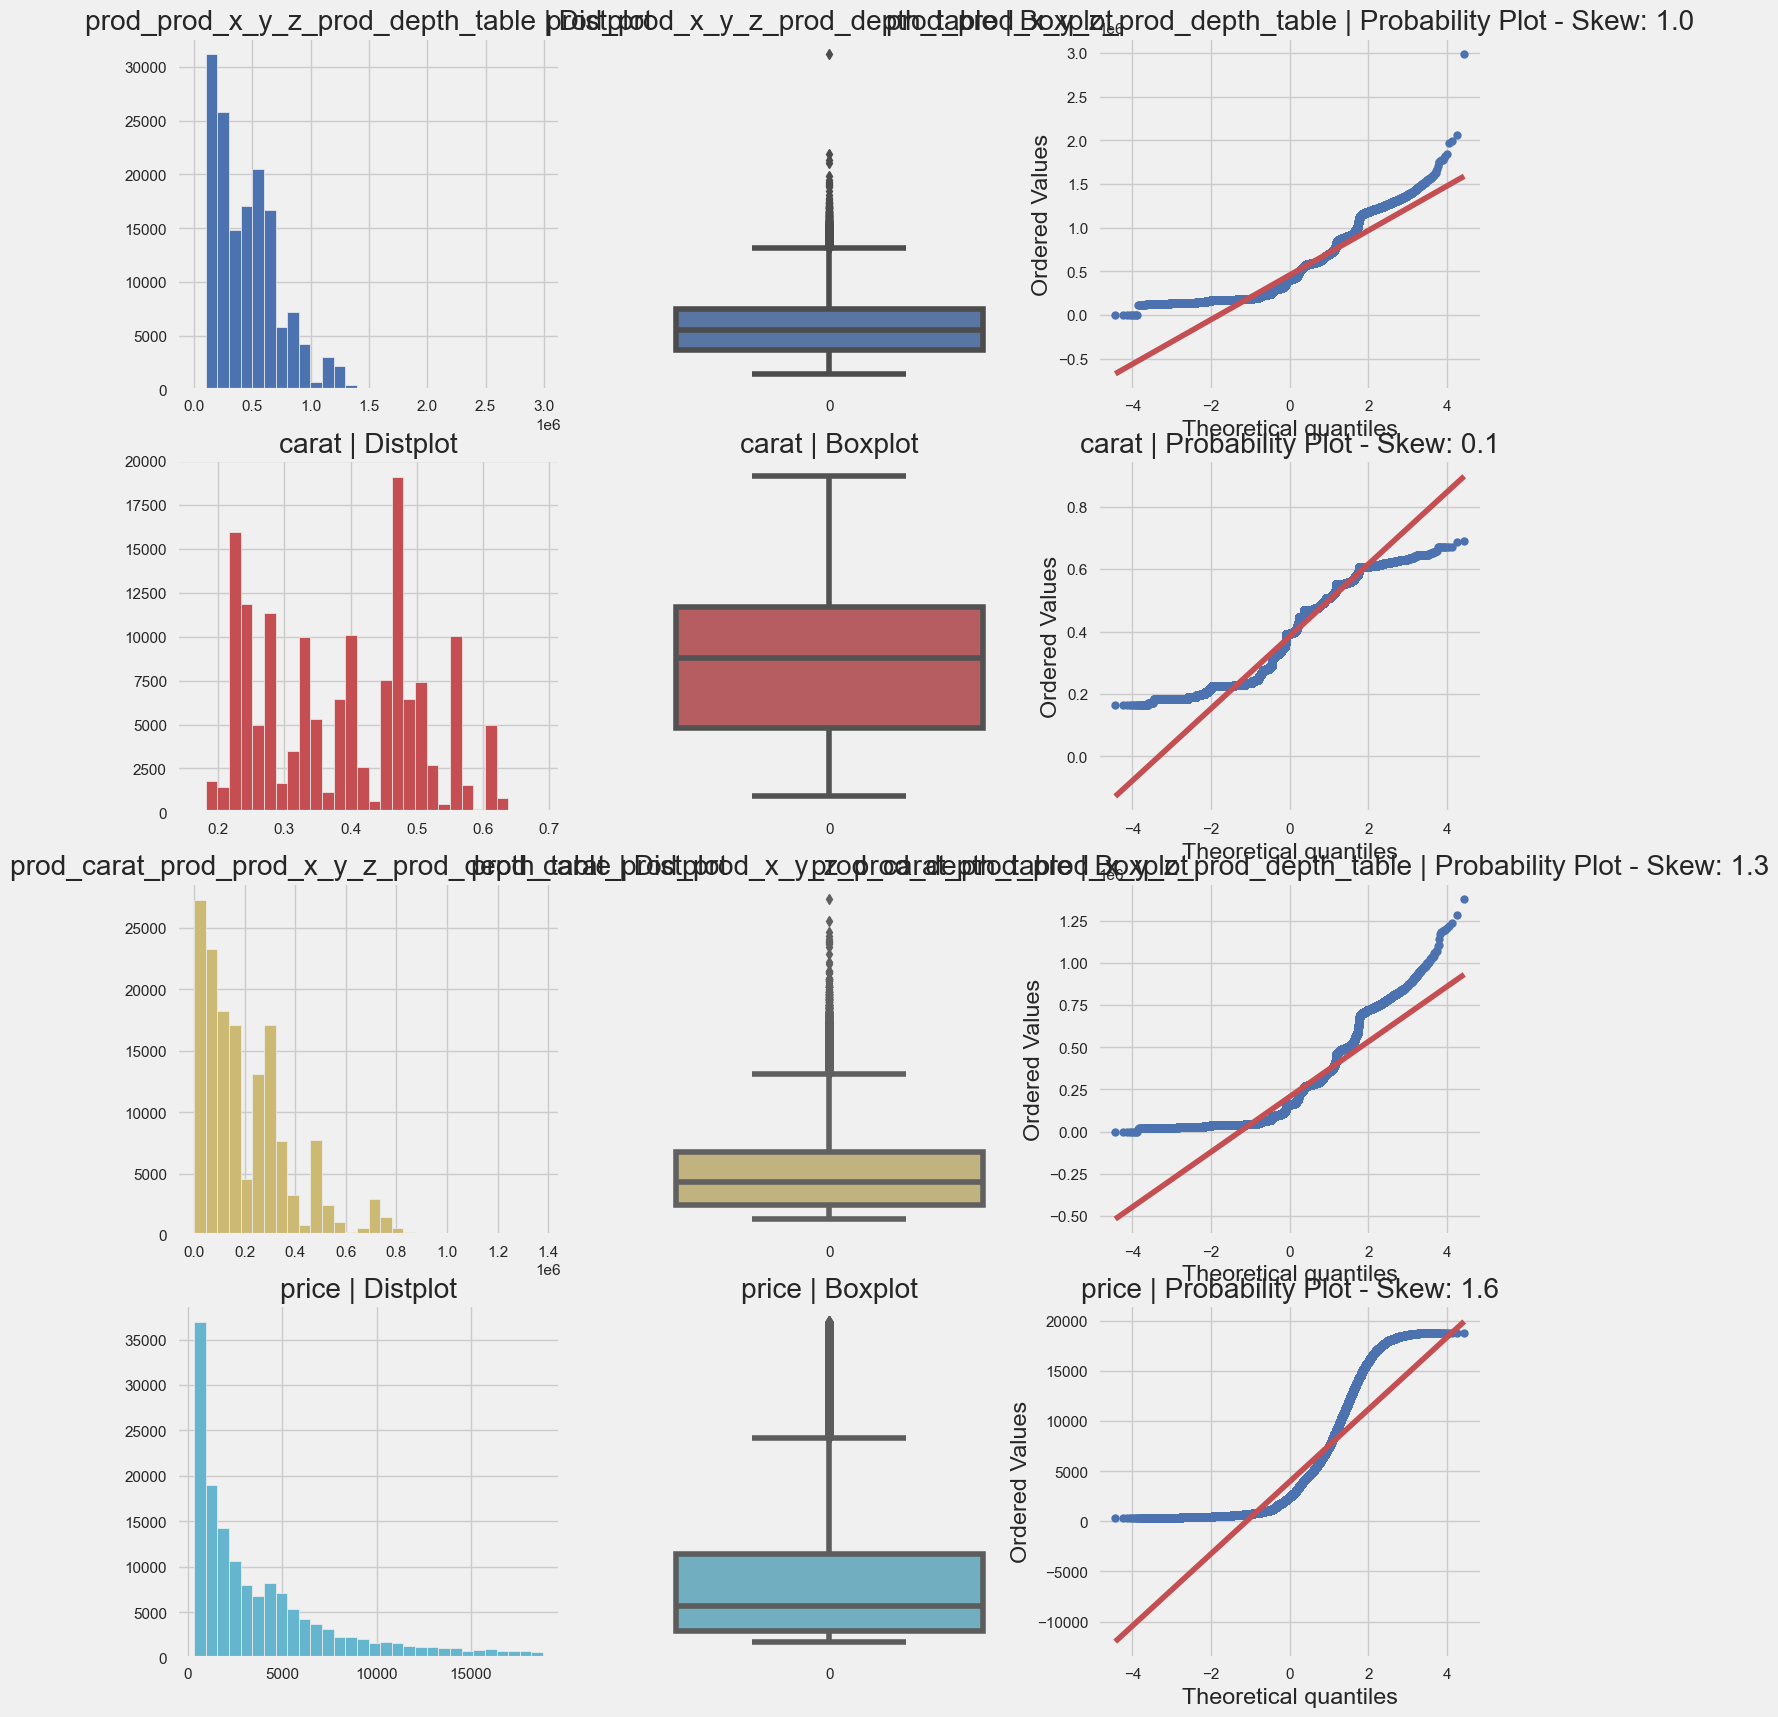

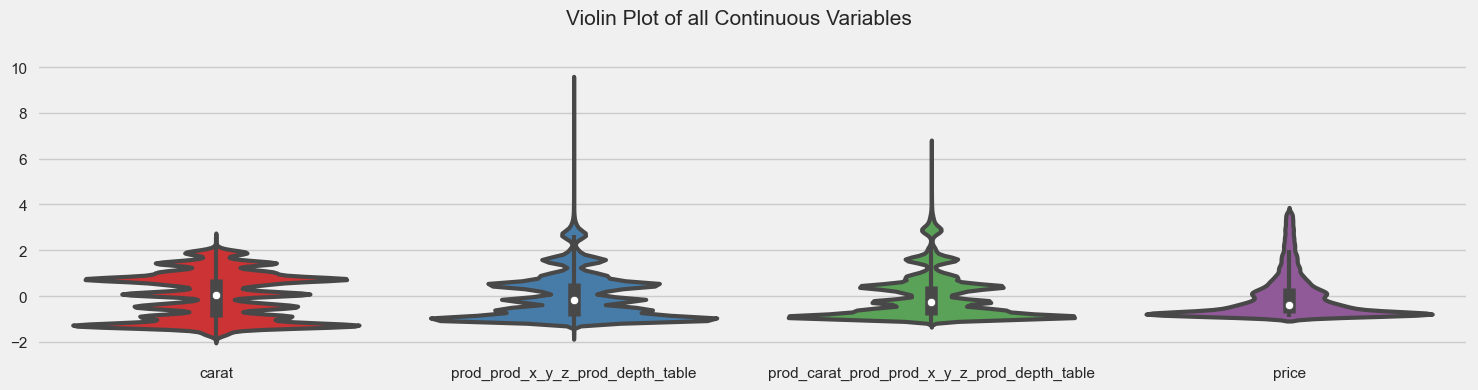

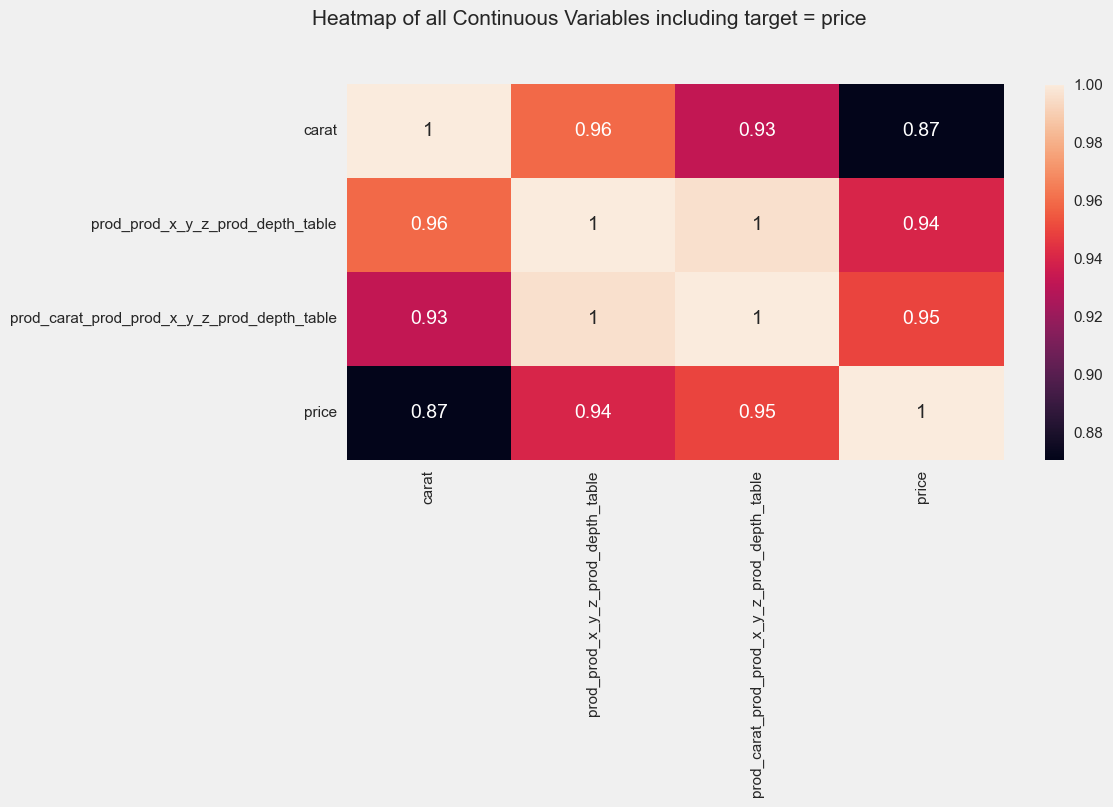

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [32]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[shape_and_weight_vars + ['prod_carat_prod_prod_x_y_z_prod_depth_table'] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [33]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z  \
0  0.555290    5      3        5   62.2   58.0  7.27  7.33  4.55   
1  0.609005    3      7        7   62.0   58.0  8.06  8.12  5.05   
2  0.391096    6      4        4   61.2   57.0  5.69  5.73  3.50   
3  0.235654    6      4        4   61.6   56.0  4.38  4.41  2.71   
4  0.576819    5      4        5   62.6   59.0  7.65  7.61  4.77   

   sum_cut_color_clarity  mean_cut_color_clarity  prod_cut_color_clarity  \
0                   13.0                4.333333                    75.0   
1                   17.0                5.666667                   147.0   
2                   14.0                4.666667                    96.0   
3                   14.0                4.666667                    96.0   
4                   14.0                4.666667                   100.0   

   prod_x_y_z  prod_depth_table  prod_prod_x_y_z_prod_depth_table  \
0  242.465405            3607.6                      8.747182e+05   
1  330.508360            3596.0                      1.188508e+06   
2  114.112950            3488.4                      3.980716e+05   
3   52.345818            3449.6                      1.805721e+05   
4  277.692705            3693.4                      1.025630e+06   

   prod_carat_prod_prod_x_y_z_prod_depth_table  
0                                485722.667185  
1                                723807.692660  
2                                155684.330179  
3                                 42552.562276  
4                                591602.692584

In [34]:
# Shape measurements
clarity_shape_vars_total = ["prod_cut_color_clarity","prod_carat_prod_prod_x_y_z_prod_depth_table"]


clarity_shape_transformer_total = MathFeatures(
        variables = clarity_shape_vars_total,
        func = lambda x: x.prod_carat_prod_prod_x_y_z_prod_depth_table/x.prod_cut_color_clarity,
        new_variables_names = ["one_total_measurement"])

X = clarity_shape_transformer_total.fit_transform(X)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 2)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################


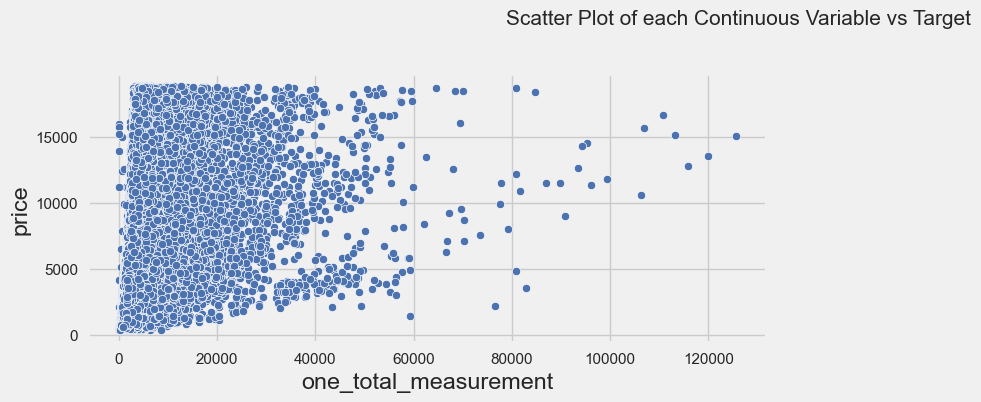

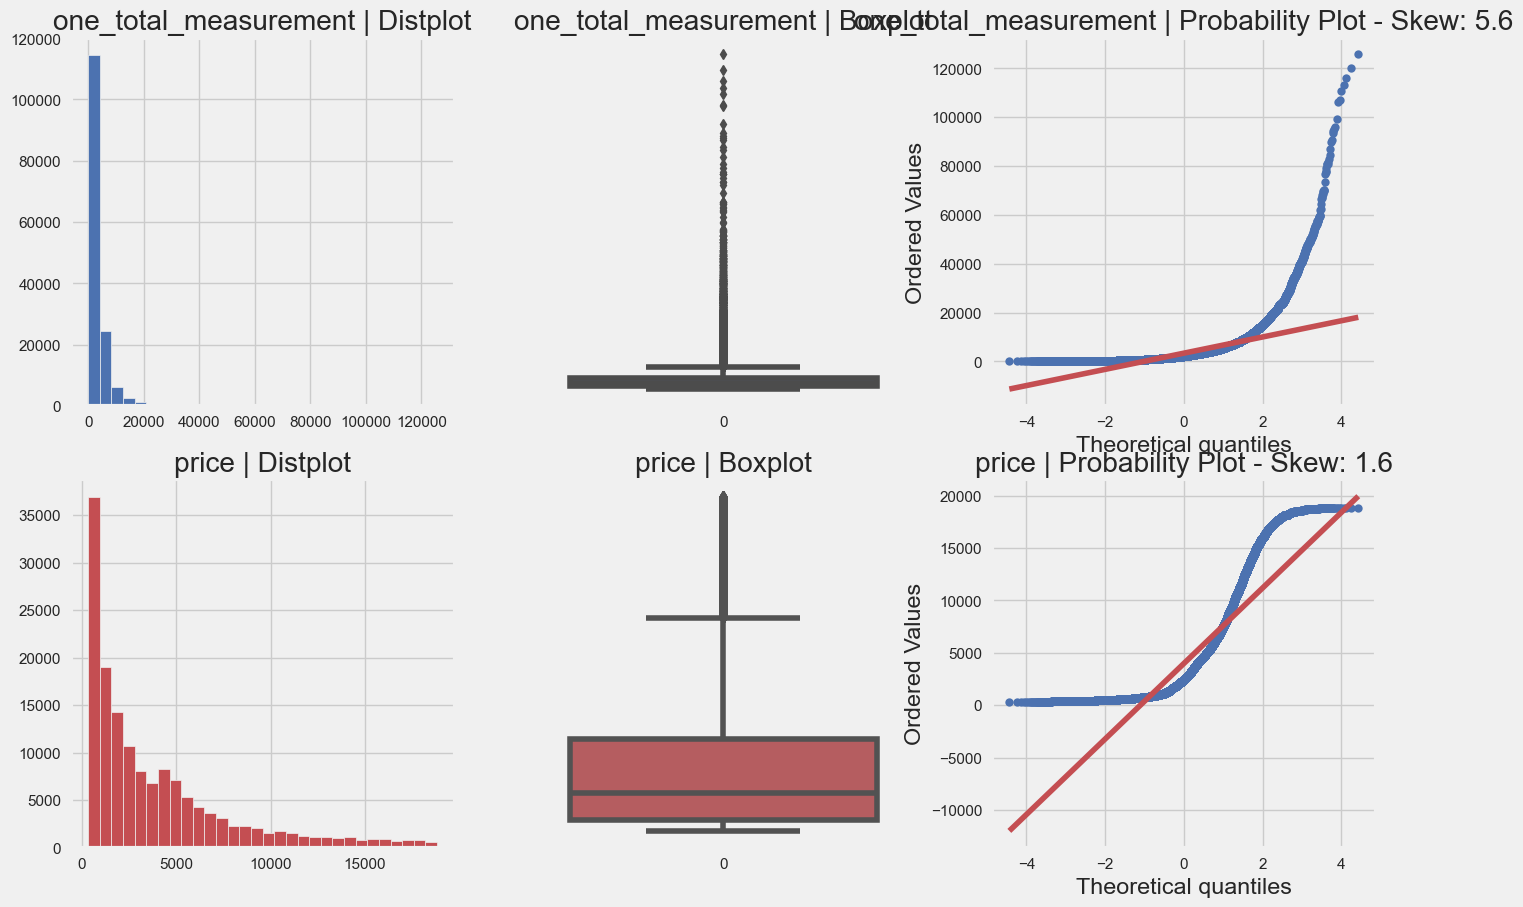

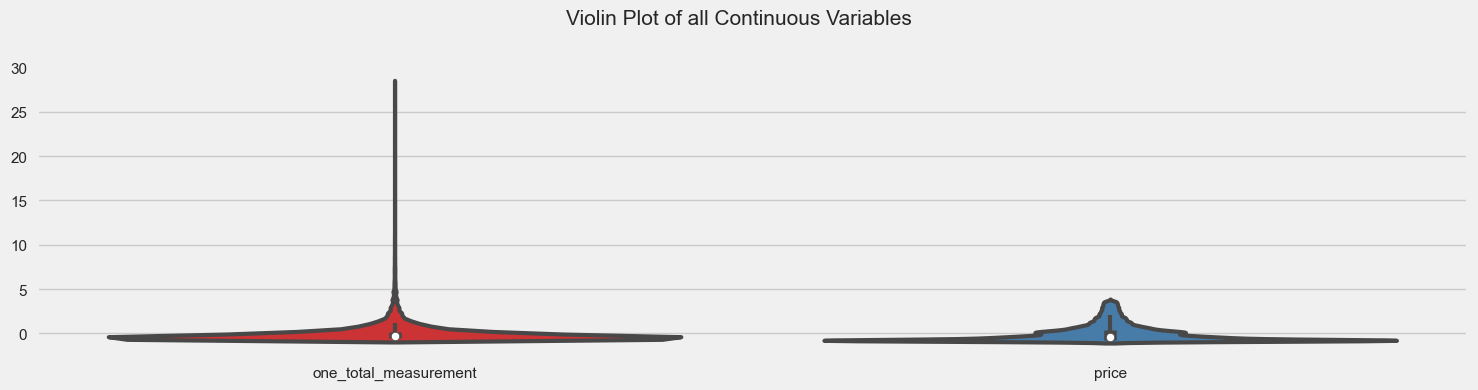

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [35]:
%matplotlib inline
_ = AV.AutoViz(
    "",
    depVar = "price",
    dfte = pd.concat([X,y], axis = 1)[["one_total_measurement"] + ["price"]],
    verbose = 1,
    lowess=False,
    chart_format="svg"
)

In [36]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z  \
0  0.555290    5      3        5   62.2   58.0  7.27  7.33  4.55   
1  0.609005    3      7        7   62.0   58.0  8.06  8.12  5.05   
2  0.391096    6      4        4   61.2   57.0  5.69  5.73  3.50   
3  0.235654    6      4        4   61.6   56.0  4.38  4.41  2.71   
4  0.576819    5      4        5   62.6   59.0  7.65  7.61  4.77   

   sum_cut_color_clarity  mean_cut_color_clarity  prod_cut_color_clarity  \
0                   13.0                4.333333                    75.0   
1                   17.0                5.666667                   147.0   
2                   14.0                4.666667                    96.0   
3                   14.0                4.666667                    96.0   
4                   14.0                4.666667                   100.0   

   prod_x_y_z  prod_depth_table  prod_prod_x_y_z_prod_depth_table  \
0  242.465405            3607.6                      8.747182e+05   
1  330.508360            3596.0                      1.188508e+06   
2  114.112950            3488.4                      3.980716e+05   
3   52.345818            3449.6                      1.805721e+05   
4  277.692705            3693.4                      1.025630e+06   

   prod_carat_prod_prod_x_y_z_prod_depth_table  one_total_measurement  
0                                485722.667185            6476.302229  
1                                723807.692660            4923.861855  
2                                155684.330179            1621.711773  
3                                 42552.562276             443.255857  
4                                591602.692584            5916.026926

## Dropping hight correlated variables

In [38]:
drop_corr_transformer =  DropCorrelatedFeatures(threshold=0.85)
X = drop_corr_transformer.fit_transform(X)

In [39]:
X.head()

carat  cut  color  clarity  depth  table  sum_cut_color_clarity  \
0  0.555290    5      3        5   62.2   58.0                   13.0   
1  0.609005    3      7        7   62.0   58.0                   17.0   
2  0.391096    6      4        4   61.2   57.0                   14.0   
3  0.235654    6      4        4   61.6   56.0                   14.0   
4  0.576819    5      4        5   62.6   59.0                   14.0   

   one_total_measurement  
0            6476.302229  
1            4923.861855  
2            1621.711773  
3             443.255857  
4            5916.026926